
# Global Warming Analysis and Prediction

### <font color=darkblue>Social and Business Importance</font>
<font color=darkblue> *Global warming is a top topic of common concern. It is important to understand how earth surface temperature is changing, the trend and to predict, which has guiding significance to many fields (agriculture, energy-efficiency, emmission control, restructuring energy industry, etc). To predict future earth surface temperature can be a pure time series problem, but global warming is also related to other factors, such as greenhouse emission, human activities, etc. In this project, I will analyze the earth surface temperature trend, develop a model to predict future earth surface temperature and also analyze how another features (CO2, population) influence the global warming.*<font>

### <font color=darkblue>Summary</font>
<font color=darkblue>__The goals of this Notebook are to: (1) establish models that can predict earth surface temperature based on various time series; (2) improve the forecasts by various models and by multivariate times series technics (exogenous features, cointegration, Granger causality analysis, VECM, additional regressors, etc); (3) analyze the relationship between temperature and other factors (CO2, population); (4) try to reach to a conclusion regarding how various factors affect the global warming trend, assess the causal relationships.__</font>

<font color=darkblue> __*This Notebook has 11 parts:*__ </font>

<font color=darkblue> __*1. Data collection and cleaning*__ </font>

<font color=darkblue> __*2. Exploratory Data Analysis, statistics, relevant social and environment analysis*__ </font>

<font color=darkblue>__*3. Preprocessing*__ </font>

<font color=darkblue>__*4. Various models, ARIMA, SARIMAX, Grid Search*__ </font>

<font color=darkblue>__*5. Cointegration analysis and tests -- foundation of exogenous variables*__ </font>

<font color=darkblue>__*6. Model improving -- ARIMAX with exogenous features, Grid Search*__ </font>

<font color=darkblue>__*7. Granger Causality analysis and explanation -- foundation of multivariates*__ </font>

<font color=darkblue>__*8. More models -- Vector Auto Regression (VAR) and Grid Search for multivariate time series*__ </font>

<font color=darkblue>__*9. More models -- Vector Error Correction Model (VECM) and Grid Search for multivariate time series*__ </font>

<font color=darkblue>__*10. More models -- Fbprophet*__ </font>

<font color=darkblue>__*11. Conclusions*__ </font>

## 1. Data collection and cleaning

<font color=darkblue>__*There are 3 data sources for this project:*__ </font>

<font color=darkblue>__*(1) Global land temperature data (get from kaggle.com)*__ </font>

<font color=darkblue>__*(2) Global population and urban population data (web scrape from www.johnstonsarchive.net)*__ </font>

<font color=darkblue>__*(3) Carbon dioxide concentration data (get from datahub.io)*__ </font>

### 1.1 Get land temperature dataset from kaggle.com, understand data, check data and clean temperature dataframe

In [9]:
# import packages needed for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import VECM
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import grangercausalitytests
import plotly
import statsmodels.api as sm
from pmdarima import model_selection
import pmdarima as pm
import fbprophet
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
%matplotlib inline
sm.tsa.statespace.SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('GlobalTemperatures.csv')
df.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.tail(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


As we can see from the above dataframe, there are columns 'dt' (observation date), LandAverageTemperature, LandAverageTemperatureUncertainty, LandMaxTemperature, LandMaxTemperatureUncertainty, LandMinTemperature, LandAndOceanAverageTemperature (uncertainty is the range of fluctuation of thermometer reading)...

In this project, I will focus on Land Average Temperature changing with time. Now it is time to check the data and clean it.

In [24]:
df.shape

(3192, 9)

In [25]:
df[['dt','LandAverageTemperature']].isna().sum()

dt                         0
LandAverageTemperature    12
dtype: int64

In [26]:
df[['dt','LandAverageTemperature']].isna()[36:].sum()

dt                        0
LandAverageTemperature    0
dtype: int64

I noticed that the temperature observation is recorded at beginning of every month from 1750 to 2015. There is NaN value in the first 3 years, since I have more than enough data, I can drop year 1750, 1751 and 1752

In [27]:
df = df[36:]
# save original dataframe for future use
df1 = pd.read_csv('GlobalTemperatures.csv')

In [38]:
type(df.dt.iloc[0])

str

In [39]:
df['date'] = pd.to_datetime(df.dt)
df = df.set_index('date')

### 1.2 Web scraping global population data and global urban population data from www.johnstonsarchive.net , understand the data, check the data and clean the dataframe

#### Please see the separate notebook "webscraping" in the repository for code of web scraping and relevant data cleaning. The population data was saved in 2 csv files, 'pop.csv' (world population data) and 'ur.csv' (urban population data) from year 1950 to 2015

The reason to scrape population data is because industrial activities of human beings caused lots of polution, harmful gas. Population expansion and human activities are important facts that are related to global warming ('greenhouse effect'), 1,300 independent scientific experts from countries all over the world under the auspices of the United Nations, concluded there's a more than 95 percent probability that human activities over the past 50 years have warmed our planet. 

The industrial activities that our modern civilization depends upon have raised atmospheric carbon dioxide levels from 280 parts per million to 412 parts per million in the last 150 years. Human activitis also generate water vapor, Nitrous oxide and methane.

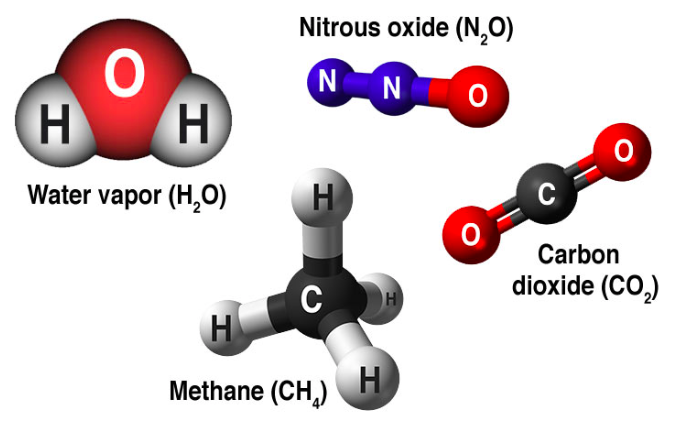

__Common greenhouse gases generated by human activities.__

In [484]:
df_pop = pd.read_csv('pop.csv', index_col=0)
df_ur = pd.read_csv('ur.csv', index_col=0)

In [485]:
df_pop.tail()

,year,world,Africa,Asia,Europe,LatinAmerica,NorthAmerica,Austr/Oceania
61,2011,6996.04,1056.80,4208.42,740.87,602.82,349.38,37.18
62,2012,7076.81,1083.16,4251.85,741.43,609.53,352.28,37.72
63,2013,7158.52,1110.17,4295.73,742.00,616.30,355.21,38.26
64,2014,7241.18,1137.86,4340.06,742.56,623.16,358.15,38.80
65,2015,7324.78,1166.24,4384.84,743.12,630.09,361.13,39.36


In [486]:
df_ur.tail()

,year,urban,rural,developed,developing,communist,Jewish,Christian,Catholic,Protestant,Muslim
61,2011,3647.81,3348.23,NaN,NaN,NaN,13.658,,,,
62,2012,3722.96,3353.85,NaN,NaN,NaN,13.753,,,,
63,2013,3799.33,3359.19,NaN,NaN,NaN,13.855,,,,
64,2014,3876.97,3364.21,NaN,NaN,NaN,,"2,375.62","1,219.95",441.444,"1,660.73"
65,2015,3955.76,3369.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [487]:
df_pop.shape, df_ur.shape

((66, 8), (66, 11))

In [488]:
df_pop[['year','world']].isna().sum()

year     0
world    0
dtype: int64

In [489]:
df_ur[['year','urban','rural']].isna().sum()

year     0
urban    0
rural    0
dtype: int64

In [490]:
df_pop[['year','world']].dtypes

year       int64
world    float64
dtype: object

In [491]:
df_ur[['year','urban','rural']].dtypes

year       int64
urban    float64
rural    float64
dtype: object

In [498]:
df_pop['date'] = pd.to_datetime(df_pop.year, format='%Y')
df_pop = df_pop.set_index('date')
df_ur['date'] = pd.to_datetime(df_ur.year, format='%Y')
df_ur = df_ur.set_index('date')

In [223]:
# save original dataframe for future use
df_pop1 = pd.read_csv('pop.csv', index_col=0)
df_ur1 = pd.read_csv('ur.csv', index_col=0)

### 1.3 Get carbon dioxide concentration data from esrl.noaa.gov (Earth System Research Laboratories), understand the data, check the data and clean up the dataframe

There are 3 datasets. co2-mm-mlo_csv.csv (monthly carbon dioxide concentration observations from 1958) and co2-annmean-mlo.csv (yearly average carbon dioxide concentration observations from 1958) are from Earth System Research Laboratories (Global Monitoring Laboratory). co2history.csv (yearly average carbon dioxide concentration observations from 0 t0 2015) from Eidg. Institute für Atmosphäre und Klima ETH (Switzerland)

In [133]:
df_com = pd.read_csv('co2-mm-mlo_csv.csv') # carbon dioxide data monthly
df_coa = pd.read_csv('co2-annmean-mlo.csv') # carbon dioxide data annually

In [134]:
df_com.head(5)

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1


In [135]:
df_coa.head(5)

,Year,Mean,Uncertainty
0,1959-11-01,315.97,0.12
1,1960-11-01,316.91,0.12
2,1961-11-01,317.64,0.12
3,1962-11-01,318.45,0.12
4,1963-11-01,318.99,0.12


In [136]:
df_com[['Date','Average']].isna().sum()

Date       0
Average    0
dtype: int64

In [137]:
df_coa[['Year','Mean']].isna().sum()

Year    0
Mean    0
dtype: int64

In [138]:
type(df_com.Date[0]), type(df_coa.Year[0])

(str, str)

In [139]:
df_com['date'] = pd.to_datetime(df_com.Date)
df_com = df_com.set_index('date')

In [140]:
df_coa['date'] = pd.to_datetime(df_coa.Year)
df_coa = df_coa.set_index('date')

In [141]:
df_com[df_com.Average < 313]

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
date,,,,,,
1958-06-01,1958-06-01,1958.458,-99.99,317.10,314.85,-1
1958-10-01,1958-10-01,1958.792,-99.99,312.66,315.61,-1
1964-02-01,1964-02-01,1964.125,-99.99,320.07,319.61,-1
1964-03-01,1964-03-01,1964.208,-99.99,320.73,319.55,-1
1964-04-01,1964-04-01,1964.292,-99.99,321.77,319.48,-1
1975-12-01,1975-12-01,1975.958,-99.99,330.59,331.60,0
1984-04-01,1984-04-01,1984.292,-99.99,346.84,344.27,2


In [142]:
df_coa[df_coa.Mean < 315]

,Year,Mean,Uncertainty
date,,,


As we can see from above, the reason for annual carbon dioxide dataframe does not have year 1958 is because year 1958 is missing Jan, Feb and does not have correct observation for Jun and Oct, so we can drop the year 1958 from df_com, and also replace wrong observation value in 1964 and 1975 and 1984 with the average value of previous & post 3 values

In [146]:
ave1 = np.mean([df_com.loc['1963-11-01']['Average'],df_com.loc['1963-12-01']['Average'],
                df_com.loc['1964-01-01']['Average'],df_com.loc['1964-05-01']['Average'],
                df_com.loc['1964-06-01']['Average'],df_com.loc['1964-07-01']['Average']])
df_com.loc['1964-02-01','Average'] = ave1
df_com.loc['1964-03-01','Average'] = ave1
df_com.loc['1964-04-01','Average'] = ave1

ave1 = np.mean([df_com.loc['1975-09-01']['Average'],df_com.loc['1975-10-01']['Average'],
                df_com.loc['1975-11-01']['Average'],df_com.loc['1976-01-01']['Average'],
                df_com.loc['1976-02-01']['Average'],df_com.loc['1976-03-01']['Average']])
df_com.loc['1975-12-01','Average'] = ave1

ave1 = np.mean([df_com.loc['1984-01-01']['Average'],df_com.loc['1984-02-01']['Average'],
                df_com.loc['1984-03-01']['Average'],df_com.loc['1984-05-01']['Average'],
                df_com.loc['1984-06-01']['Average'],df_com.loc['1984-07-01']['Average']])
df_com.loc['1984-04-01','Average'] = ave1

df_com = df_com[10:]

In [157]:
# save the original dataframe for future use
df_com1 = pd.read_csv('co2-mm-mlo_csv.csv')
df_coa1 = pd.read_csv('co2-annmean-mlo.csv')

In [1315]:
df_coh = pd.read_csv('co2history.csv')
df_coh1 = pd.read_csv('co2history.csv') # save an original dataframe for use

In [1316]:
df_coh.tail(5)

,year,data_mean_global,data_mean_nh,data_mean_sh
2011,2011,390.944015,393.041154,388.846876
2012,2012,393.015993,395.036206,390.995779
2013,2013,395.724979,397.714917,393.735042
2014,2014,397.546977,399.590917,395.503037
2015,2015,399.851668,401.739892,397.723974


In [1317]:
df_coh[['year','data_mean_global']].isna().sum()

year                0
data_mean_global    0
dtype: int64

In [1318]:
is_numeric_dtype(df_coh['year']), is_numeric_dtype(df_coh['data_mean_global'])

(True, True)

## 2. Exploratory data analysis, relevant social and environment analysis

### 2.1 The earth surface temperature change trend

In [176]:
# create a simple dataframe just for average land surface temperature each year
dfy = pd.DataFrame(df.groupby(df.index.year).LandAverageTemperature.mean())

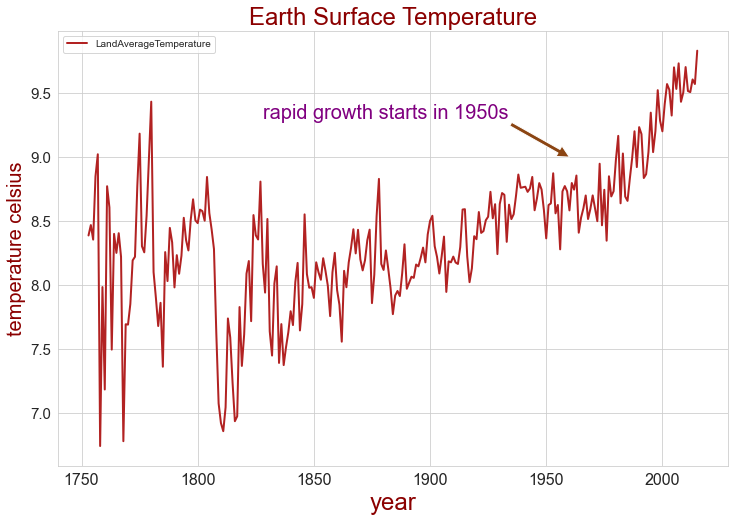

In [418]:
sns.set_style('whitegrid')
dfy.plot(figsize=(12,8), linewidth=2, color='firebrick')
plt.xlabel('year',fontsize=24, color='darkred')
plt.ylabel('temperature celsius', fontsize=20, color='darkred')
plt.xticks(fontsize=16)
plt.yticks(fontsize=15)
plt.title('Earth Surface Temperature', fontsize=24, color='darkred')
plt.annotate('rapid growth starts in 1950s', xy=(1960,9.0), xytext=(1828,9.3),
             color='purple', fontsize=20, arrowprops=dict(facecolor = 'saddlebrown'));

In [301]:
dfy[:100].mean()

LandAverageTemperature    8.05065
dtype: float64

In [307]:
len(df_coh['data_mean_global'][1753:]), len(np.arange(1753,2015))

(262, 262)

In [310]:
df_coh['data_mean_global'][1753:][:100].mean()

280.84100993465165

__<font color=darkblue>*As we can see from the above plot, there is a clear trend showing global land average temperature is raising from 18th century to now. We can also see that before 1950s, temperature increase was slow for 200 years, ever since 1950s, rapid growth started.*<font>__

### 2.2 Carbon dioxide concentration changes over time

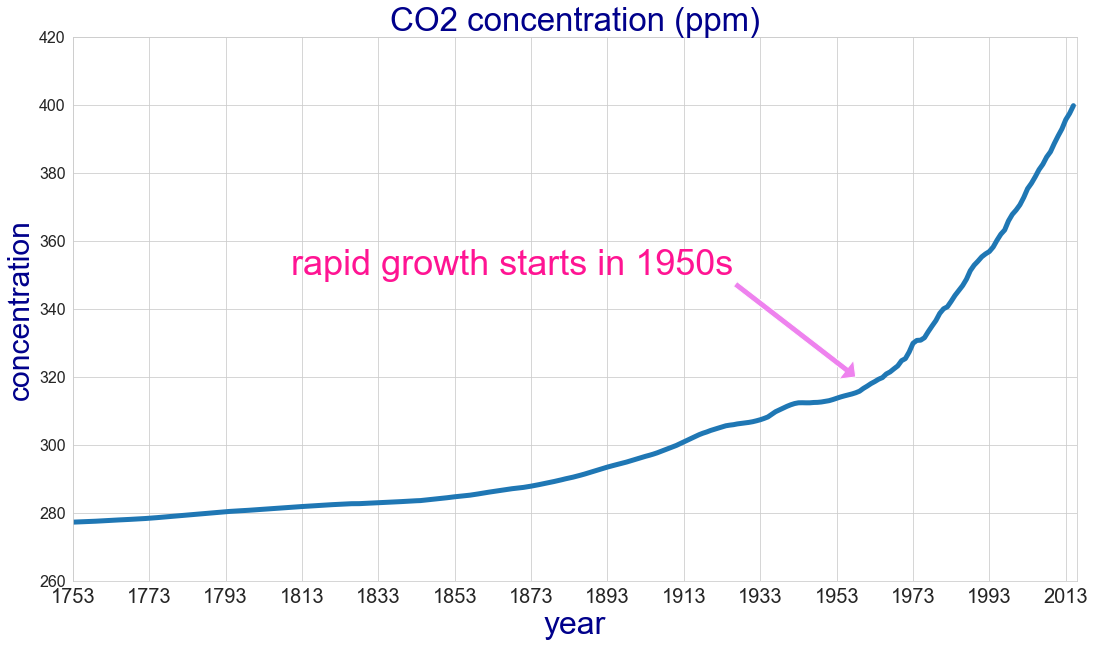

In [1514]:
plt.figure(figsize=(18,10))
df_coh['data_mean_global'][1753:].plot(linewidth=5)
plt.xlim([1753,2016])
plt.ylim([260,420])
plt.xticks(np.arange(1753,2016,20),fontsize=20);
plt.xlabel('year',fontsize=32, color='darkblue')
plt.ylabel('concentration', fontsize=30, color='darkblue')
plt.title('CO2 concentration (ppm)', fontsize=33, color='darkblue')
plt.yticks(fontsize=16);
plt.annotate('rapid growth starts in 1950s', xy=(1958,320), xytext=(1810,350), color='deeppink',
             arrowprops=dict(facecolor='violet',width=6,headwidth=24), fontsize=36);

__<font color=darkblue>*In this plot, the carbon dioxide concentration in air also increases from 18th century to now. And it is very clear that the ascending rate keeps raising after the end of 19th century, especially after 1950s, we can see significant raise in ascending rate. Compare to the previous land surface temperature growth rate,<font> <font color=red>is this a coincidence?*__

<font color=darkblue>*Comparing the temperature graph and CO2 concentration graph, the difference is very obvious. The land surface temperature plot has lots of __fluctuations, especially before 1900, the older the data the more fluctuation can be seen. This is because thermal measurement and sensoring were not developed before a hundred years ago, heavily relying on manual work. The fluctuation in recent 100 years are much smaller. On the other hand, CO2 concentration value keeps increasing continuously.__<font>*

### 2.3 Since I find the above coincidence, I need to dig further.

For both temperature and CO2 concentration data, use the average value of first 100 years as base value and denominator, get the ratio of all values to the base.

In [1320]:
df_co1753 = df_coh['data_mean_global'][1753:]

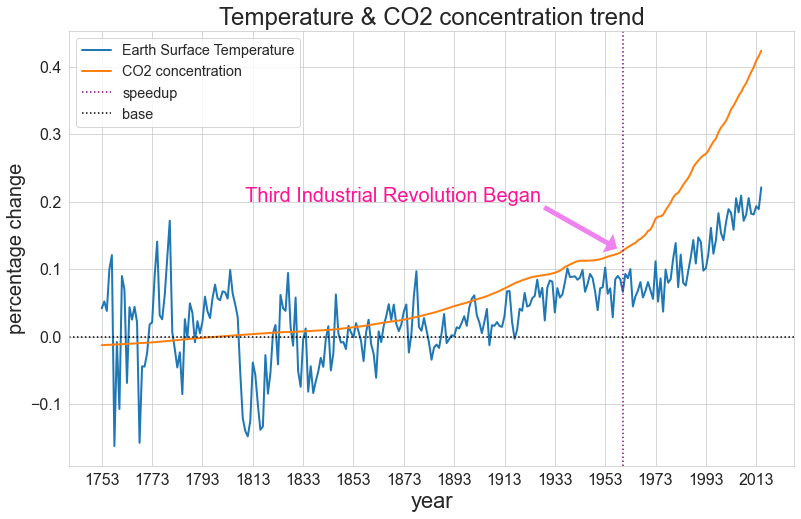

In [1321]:
plt.figure(figsize=(13,8));
plt.plot((dfy - dfy[:100].mean())/(dfy[:100].mean()), linewidth=2);
plt.plot((df_co1753 - df_co1753[:100].mean())/(df_co1753[:100].mean()), linewidth=2);
plt.xticks(np.arange(1753,2015,20),fontsize=16);
plt.xlabel('year',fontsize=22)
plt.ylabel('percentage change', fontsize=20)
plt.yticks(fontsize=13)
plt.title('Temperature & CO2 concentration trend', fontsize=24)
plt.yticks(fontsize=16);
plt.axvline(1960, lw=1.5, c='darkmagenta', label='speedup', linestyle=':')
plt.axhline(lw=1.5, c='k', label='baseline', linestyle=':')
plt.legend(('Earth Surface Temperature','CO2 concentration','speedup','base'), 
           loc='upper left', fontsize='x-large');
plt.annotate('Third Industrial Revolution Began', xy=(1958,0.13), xytext=(1810,0.2), color='deeppink',
             arrowprops=dict(facecolor='violet',width=6,headwidth=24), fontsize=20);

__<font color=darkblue>*As shown in this plot, both the Earth Surface Temperaturere rising and CO2 concentration rising are speeding up around 1950 - 1960, when Third Industrial Revolution began. I believe CO2 concentration must have influence on the global warming (although majority of people support this view, there are few people claim this is not true)<font>*__

### 2.4 The world population trend and urban population trend

It is also commonly believed that human activities (power production, various industries) are strongly related to global warming. Generally, the more people, the more living resources are needed, the more energy are consumed, thus, more polution and harmful gases are generated. The world population and urban population data are from 1950, data before 1950 are not complet and reliable, since census system was not developed in many countries.

__But I believe the majority of polution and harmful gases are generated by urban population__, because per individual, urban people are consuming much more energy and are producing much more greenhouse gases than rural population. 

Also, greenhouse gas is not just CO2, other gases such as water vapor, Nitrous oxide and methane also are also related to global warming. So, CO2 data only is not enough.

In [506]:
df_ur.head()

,year,urban,rural,developed,developing,communist,Jewish,Christian,Catholic,Protestant,Muslim
date,,,,,,,,,,,
1950-01-01,1950,743.60,1782.18,812.94,1712.84,854.19,11.297,,,,
1951-01-01,1951,767.15,1805.71,822.49,1750.36,873.14,,,,,
1952-01-01,1952,791.00,1828.29,832.46,1786.83,889.87,,,,,
1953-01-01,1953,815.80,1850.07,842.68,1823.18,905.14,,,,,
1954-01-01,1954,841.62,1871.55,853.03,1860.15,919.80,,,,,


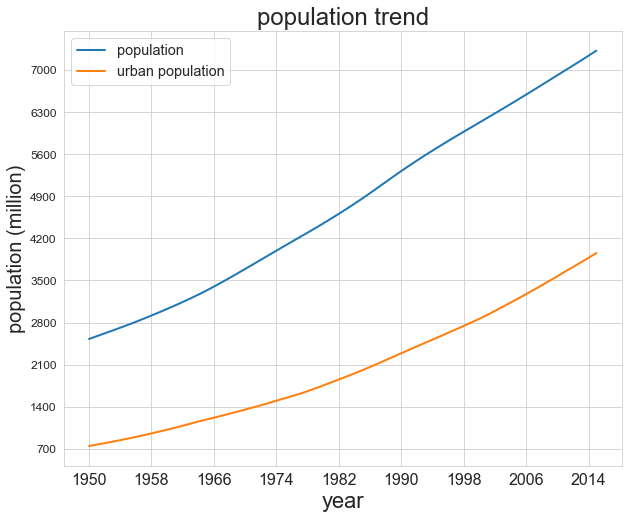

In [1471]:
plt.figure(figsize=(10,8));
plt.plot(df_pop.year, df_pop.world, linewidth=2);
plt.plot(df_ur.year, df_ur.urban, linewidth=2);
plt.xticks(np.arange(1950,2015,8),fontsize=16);
plt.yticks(np.arange(700,7700,700), fontsize=12);
plt.xlabel('year',fontsize=22)
plt.ylabel('population (million)', fontsize=20)
plt.title('population trend', fontsize=24)
plt.legend(('population','urban population'), loc='upper left', fontsize='x-large');

<font color=darkblue>*As we can see from the above plot, the world total population and urban population have been both steadily growing during past 70 years. __Ever since Third Industrial Revolution__ (after world war II in 1940s), many countries were experiencing period of restoration and heavy production.*

*But __Ever since Third Industrial Revolution__, many countries (especially developing countries) has been through modern industrialization and urbanization, people migrated to urban areas, thus produced much more polution and harmful gases compared to rural life. Lets take a look!<font>*

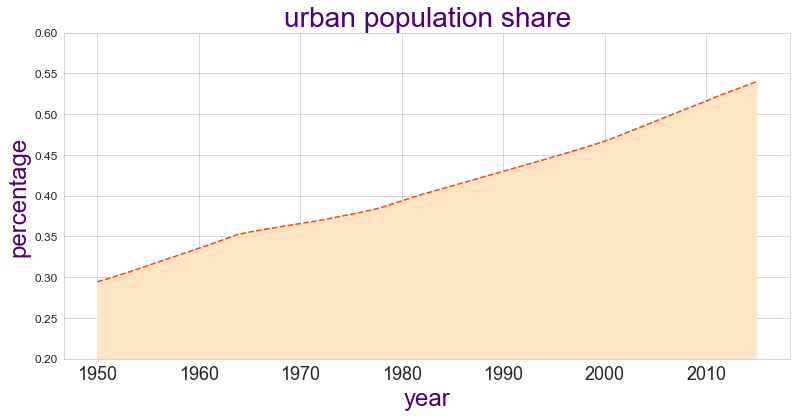

In [547]:
plt.figure(figsize=(13,6))
plt.plot(df_ur.urban/df_pop.world, 'k--', color='orangered')
plt.fill_between((df_ur.urban/df_pop.world).index, (df_ur.urban/df_pop.world).values, color='bisque')
plt.ylim([0.2, 0.6])
plt.xticks(fontsize=18);
plt.xlabel('year',fontsize=24, color='indigo')
plt.ylabel('percentage', fontsize=24, color='indigo')
plt.title('urban population share', fontsize=28, color='indigo')
plt.yticks(fontsize=12);

__<font color=darkblue>*This plot confirms the idea of urban population share increased ever since the Third Industrial Revolution Began in 1950s. More and more people move to urban area, and the percentage of urban population almost doubled during the last 60 years <font>*__

## 3. Preprocessing

### 3.1 Stationary test and autocorrelation check

#### 3.1.1 Stationary test for yearly temperature data for recent 57 years (1959 - 2015)

In [572]:
dfy1959 = dfy.loc[1959:]
diff_y1959 = dfy1959.diff().rename(columns={'LandAverageTemperature':'diff'})

In [627]:
#perform dickey fuller to see if differenced data is stationary
test = adfuller(diff_y1959['diff'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)

Test Statistic                -6.277626e+00
p-value                        3.865698e-08
#Lags Used                     6.000000e+00
Number of Observations Used    4.900000e+01
dtype: float64


For the yearly temperature data of recent 57 years, 1st order differencing makes stationary.

#### 3.1.2 Stationary test for yearly temperature data from year 1753

In [628]:
diff_y1753 = dfy.diff().rename(columns={'LandAverageTemperature':'diff'})
test = adfuller(diff_y1753['diff'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)

Test Statistic                -7.055063e+00
p-value                        5.401892e-10
#Lags Used                     1.600000e+01
Number of Observations Used    2.450000e+02
dtype: float64


For the yearly temperature data of recent since 1753, 1st order differencing makes stationary.

#### 3.1.3 Stationary test for monthly temperature data for recent 57 years (1959 - 2015)

In [612]:
dfm1959 = df.LandAverageTemperature[(1959-1753)*12:]
dfm1959 = pd.DataFrame(dfm1959.values, index=dfm1959.index, columns=['Temp'])

In [629]:
diff_m1959 = dfm1959.diff().rename(columns={'Temp':'diff'})
test = adfuller(diff_m1959['diff'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)

Test Statistic                -9.134084e+00
p-value                        2.967951e-15
#Lags Used                     2.000000e+01
Number of Observations Used    6.620000e+02
dtype: float64


For the monthly temperature data of recent 57 years, 1st order differencing makes stationary.

#### 3.1.4 Stationary test for monthly temperature data from year 1753

In [621]:
dfm1753 = pd.DataFrame(df.LandAverageTemperature.values, index=df.index, columns=['Temp'])

In [630]:
diff_m1753 = dfm1753.diff().rename(columns={'Temp':'diff'})
test = adfuller(diff_m1753['diff'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)

Test Statistic                -1.601077e+01
p-value                        6.359565e-29
#Lags Used                     2.700000e+01
Number of Observations Used    3.127000e+03
dtype: float64


For the monthly temperature data of recent since 1753, 1st order differencing makes stationary.

### 3.2 Autocorrelation and partial autocorrelation

In [624]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Check autocorrelation

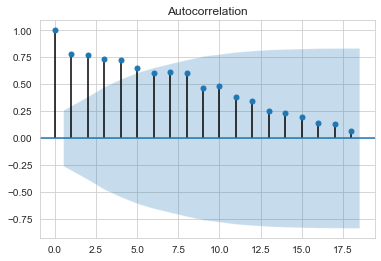

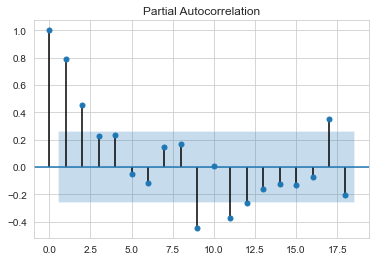

In [638]:
# plot autocorrelation for each lag (alpha is confidence interval) to determine moving average and auto regressive
# yearly temperature for recent 57 years autocorrelation and partial autocorrelation
xxx = plot_acf(dfy1959, alpha=.05)
yyy = plot_pacf(dfy1959, alpha=.05)

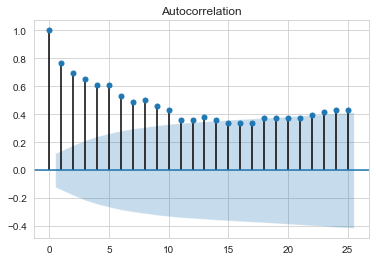

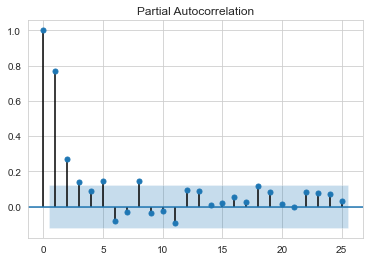

In [643]:
# yearly temperature from 1753 autocorrelation and partial autocorrelation
xxx = plot_acf(dfy, alpha=.05)
yyy = plot_pacf(dfy, alpha=.05)

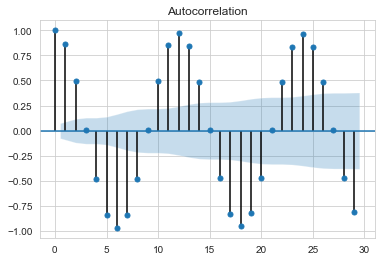

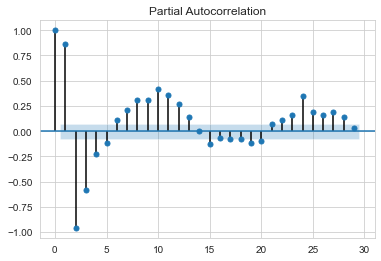

In [640]:
# monthly temperature for recent 57 years autocorrelation and partial autocorrelation
xxx = plot_acf(dfm1959, alpha=.05)
yyy = plot_pacf(dfm1959, alpha=.05)

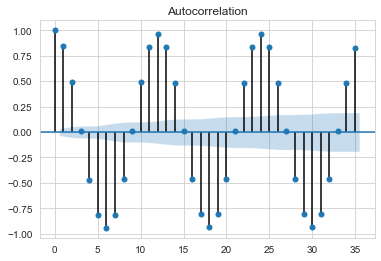

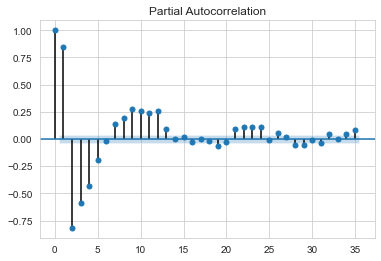

In [641]:
# monthly temperature from year 1753 autocorrelation and partial autocorrelation
xxx = plot_acf(dfm1753, alpha=.05)
yyy = plot_pacf(dfm1753, alpha=.05)

## 4. Various models, ARIMA, SARIMAX, Grid Search

When it comes to the modeling, an important thing to consider is the reliability of the data. My overall consideration is that thermal measurement and accurate sensoring were not developed before Third Industrial revolution, instruments accuracy & statistical method were not developed, measurements & recording were heavily relying on non-systematic, fragmented, manual work. The older the temperature data, the more fluctuation we can see. We can imagine that 100 years ago, people are using low-accuracy mercury to measure and most places on earth did not even have recording. So, recent years data were plausible. Same thing happens with CO2 concentration. When it comes to population, complete data can only be scraped from 1950 because in and before world war II times, many countries did not have complete census system. 

__So, firstly try recent years data__

### 4.1 Modeling with Arima with recent year earth surface temperature data

In [682]:
dfy1959_train = dfy1959.LandAverageTemperature[:round(len(dfy1959)*0.8)]
dfy1959_test = dfy1959.LandAverageTemperature[round(len(dfy1959)*0.8):]
len(dfy1959_test)

11

In [830]:
# use p, d, q, value indicated in the autocorrelation and partial autocorrelation in section 3
m_arima1959 = ARIMA(dfy1959_train, order=(6,1,2)) 
m_arima_fit1959 = m_arima1959.fit(disp=1)
print(m_arima_fit1959.summary())

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



                                ARIMA Model Results                                 
Dep. Variable:     D.LandAverageTemperature   No. Observations:                   45
Model:                       ARIMA(6, 1, 2)   Log Likelihood                  14.884
Method:                             css-mle   S.D. of innovations              0.159
Date:                      Sun, 09 Aug 2020   AIC                             -9.769
Time:                              15:52:35   BIC                              8.298
Sample:                                   1   HQIC                            -3.033
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0199      0.009      2.273      0.023       0.003       0.037
ar.L1.D.LandAverageTemp

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning:

invalid value encountered in sqrt



In [831]:
# the prediction of earth surface temperature from 2005 to 2015
m_arima_fit1959.forecast(11)[0]

array([9.55626188, 9.54725174, 9.44973816, 9.45184438, 9.64220697,
       9.67009696, 9.57668476, 9.58603981, 9.66965076, 9.66398671,
       9.63546131])

In [832]:
print('MSE:', mean_squared_error(dfy1959_test, m_arima_fit1959.forecast(11)[0]))
print('RMSE:', np.sqrt(mean_squared_error(dfy1959_test, m_arima_fit1959.forecast(11)[0])))
print('MAE:', mean_absolute_error(dfy1959_test, m_arima_fit1959.forecast(11)[0]))

MSE: 0.01654245056392364
RMSE: 0.12861745823924386
MAE: 0.10211577196315892


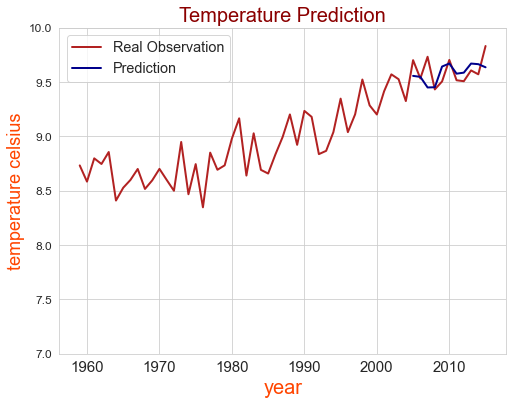

In [941]:
dfy1959.plot(figsize=(8,6), linewidth=2, color='firebrick')
plt.plot(range(2005,2016), m_arima_fit1959.forecast(11)[0], linewidth=2, color='darkblue')
plt.ylim([7,10])
plt.xlabel('year',fontsize=20, color='orangered')
plt.ylabel('temperature celsius', fontsize=18, color='orangered')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.title('Temperature Prediction', fontsize=20, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

<font color='darkblue'>__*As we can see, if we look at MSE, RMSE and MAE, the prediction is very accurate, since RMSE is only 0.12 compared to temperature around 9 Celsius.*__

### 4.2 Modeling with Arima with yearly earth surface temperature data from 1753

In [934]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.8)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.8):]
len(dfy_test)

53

In [935]:
m_arima = ARIMA(dfy_train, order=(2,2,5))
m_arima_fit = m_arima.fit(disp=1)
print(m_arima_fit.summary())

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                                 ARIMA Model Results                                 
Dep. Variable:     D2.LandAverageTemperature   No. Observations:                  208
Model:                        ARIMA(2, 2, 5)   Log Likelihood                 -83.958
Method:                              css-mle   S.D. of innovations              0.352
Date:                       Sun, 09 Aug 2020   AIC                            185.916
Time:                               17:35:01   BIC                            215.953
Sample:                                    2   HQIC                           198.061
                                                                                     
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             9.78e-05      0.000      0.610      0.542      -0.000       0.000
ar.L1.D2.Lan

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



In [936]:
print('MSE:', mean_squared_error(dfy_test, m_arima_fit.forecast(53)[0]))
print('RMSE:', np.sqrt(mean_squared_error(dfy_test, m_arima_fit.forecast(53)[0])))
print('MAE:', mean_absolute_error(dfy_test, m_arima_fit.forecast(53)[0]))

MSE: 0.05164489618297411
RMSE: 0.22725513455799873
MAE: 0.1915019955527733


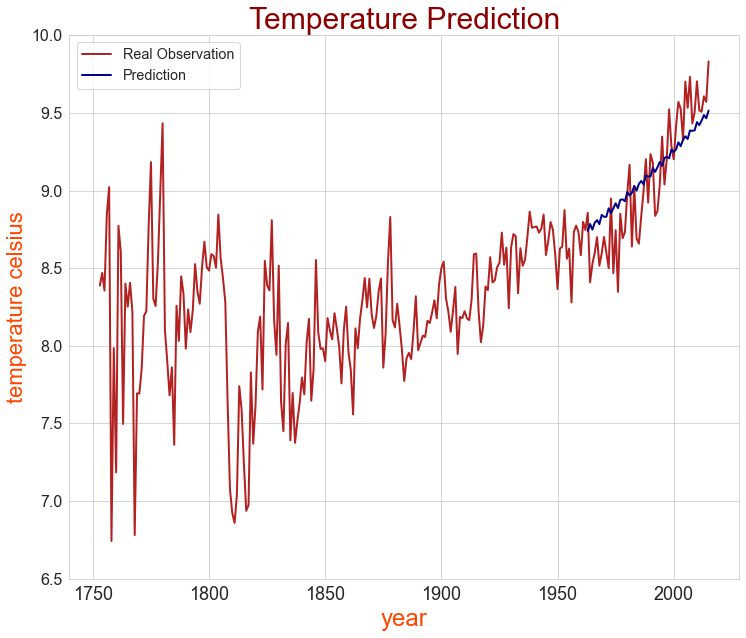

In [937]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(1963,2016), m_arima_fit.forecast(53)[0], linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*As we can see, predicting long time temperature change is not easy, the RMSE, MAE value are not as good as previous prediction for short time prediction. This is because that the earth surface temperature trend accelerate ever since 1950s. In this case, the prediction is for 53 years. In reality, more than 50 years prediction is not desired. So, let us now try 20 years!*__

In [873]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.925)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.925):]
len(dfy_test)

20

In [918]:
m_arima = ARIMA(dfy_train, order=(5,2,3));
m_arima_fit = m_arima.fit(disp=1);
print(m_arima_fit.summary());

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning:

invalid value encountered in true_divide

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning:

overflow encountered in exp

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning:

invalid value encountered in true_divide



                                 ARIMA Model Results                                 
Dep. Variable:     D2.LandAverageTemperature   No. Observations:                  241
Model:                        ARIMA(5, 2, 3)   Log Likelihood                 -85.208
Method:                              css-mle   S.D. of innovations              0.339
Date:                       Sun, 09 Aug 2020   AIC                            190.416
Time:                               16:57:56   BIC                            225.264
Sample:                                    2   HQIC                           204.455
                                                                                     
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0001      0.000      0.723      0.470      -0.000       0.000
ar.L1.D2.Lan

In [919]:
print('MSE:', mean_squared_error(dfy_test, m_arima_fit.forecast(20)[0]))
print('RMSE:', np.sqrt(mean_squared_error(dfy_test, m_arima_fit.forecast(20)[0])))
print('MAE:', mean_absolute_error(dfy_test, m_arima_fit.forecast(20)[0]))

MSE: 0.041077395447700095
RMSE: 0.20267559164265464
MAE: 0.16034038387317828


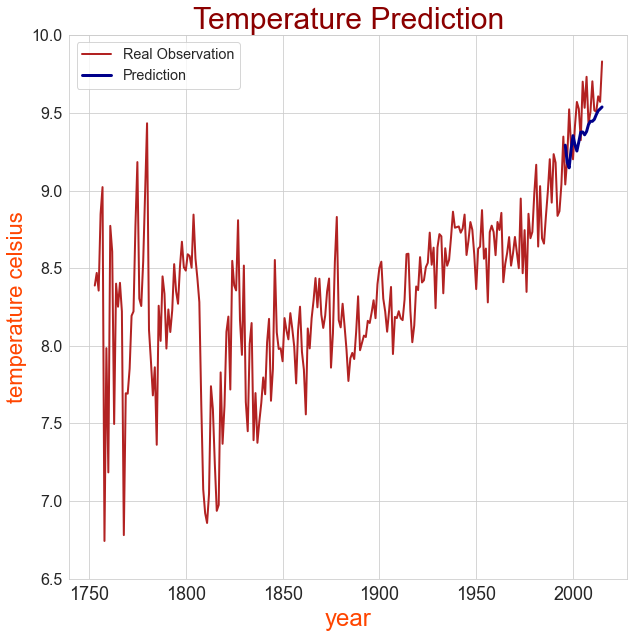

In [932]:
dfy.plot(figsize=(10,10), linewidth=2, color='firebrick')
plt.plot(range(1996,2016), m_arima_fit.forecast(20)[0], linewidth=3, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

<font color='darkblue'> __*Just as I expected, to predict 20 years earth surface temperature gives much better MSE, RMSE and MAE and also gives better prediction curves. When looking into the above graphes, the first 5 predictions are especially every close to real observations. So 20 years earth surface temperatue forecast is very applicable and can be used to guide agriculture, variuos industry and government to deal with the global warming.*__

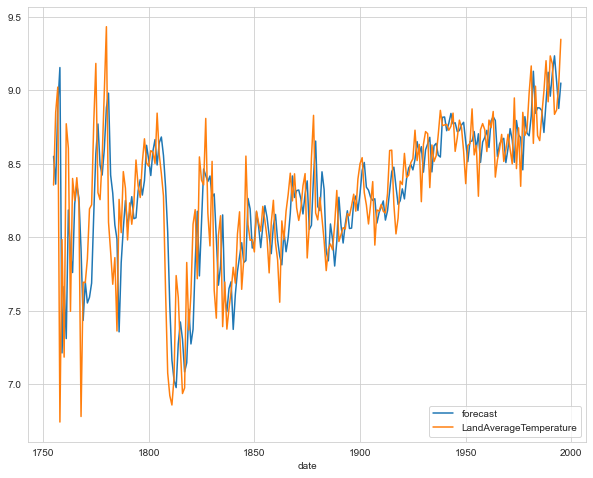

In [930]:
fig, ax = plt.subplots(figsize=(10,8))
m_arima_fit.plot_predict(ax=ax)
plt.show()

### 4.3 Modeling with SARIMAX with yearly earth surface temperature data for recent years

In [1024]:
m_sarimax1959 = sm.tsa.statespace.SARIMAX(endog = dfy1959_train, order=(5,1,8))
m_sarimax_fit1959 = m_sarimax1959.fit()
print(m_sarimax_fit1959.summary())

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                   46
Model:                   SARIMAX(5, 1, 8)   Log Likelihood                  19.273
Date:                    Mon, 10 Aug 2020   AIC                            -10.547
Time:                            00:26:50   BIC                             14.746
Sample:                                 0   HQIC                            -1.118
                                     - 46                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2779      0.424     -0.655      0.512      -1.110       0.554
ar.L2         -0.3365      0.256     -1.317      0.188      -0.837       0.164
ar.L3         -0.356

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [1025]:
m_sarimax_foca1959 = m_sarimax_fit1959.forecast(11)
print('MSE:', mean_squared_error(dfy1959_test, m_sarimax_foca1959))
print('RMSE:', np.sqrt(mean_squared_error(dfy1959_test, m_sarimax_foca1959)))
print('MAE:', mean_absolute_error(dfy1959_test, m_sarimax_foca1959))

MSE: 0.015936765500162507
RMSE: 0.12624090264317073
MAE: 0.10436216657354501


/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



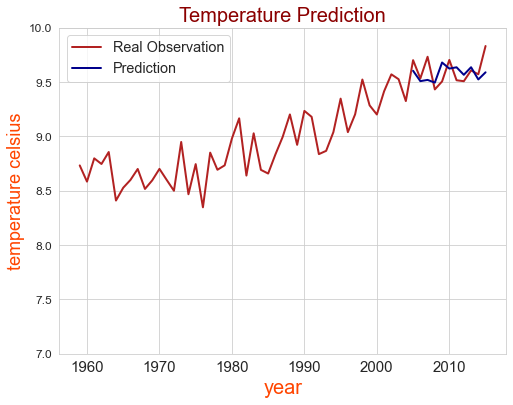

In [1026]:
dfy1959.plot(figsize=(8,6), linewidth=2, color='firebrick')
plt.plot(range(2005,2016), m_sarimax_foca1959, linewidth=2, color='darkblue')
plt.ylim([7,10])
plt.xlabel('year',fontsize=20, color='orangered')
plt.ylabel('temperature celsius', fontsize=18, color='orangered')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.title('Temperature Prediction', fontsize=20, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

<font color='darkblue'> __*When checking the metrics MSE, RMSE and MAE, we can see, the performance of forecast with SARIMAX model is similar as ARIMA model, is not improving the forecast errors. This is because the time series data is not seasonal. We can then try the SARIMAX model with all yearly earth surface temperature data from 1753.*__

### 4.4 Modeling with SARIMAX with yearly earth surface temperature data from 1753

Predict the 20 years future earth surface temperature

In [1598]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.925)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.925):]
len(dfy_test)

20

In [1608]:
m_sarimax = sm.tsa.statespace.SARIMAX(endog = dfy_train, order=(3,2,3))
m_sarimax_fit = m_sarimax.fit()
print(m_sarimax_fit.summary())

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                  243
Model:                   SARIMAX(3, 2, 3)   Log Likelihood                 -99.568
Date:                    Wed, 12 Aug 2020   AIC                            213.137
Time:                            14:39:07   BIC                            237.530
Sample:                                 0   HQIC                           222.964
                                    - 243                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3469      0.186     -7.251      0.000      -1.711      -0.983
ar.L2         -1.3047      0.203     -6.433      0.000      -1.702      -0.907
ar.L3         -0.330

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [1609]:
m_sarimax_foca = m_sarimax_fit.forecast(20)
print('MSE:', mean_squared_error(dfy_test, m_sarimax_foca))
print('RMSE:', np.sqrt(mean_squared_error(dfy_test, m_sarimax_foca)))
print('MAE:', mean_absolute_error(dfy_test, m_sarimax_foca))

MSE: 0.06182967090364505
RMSE: 0.2486557276711016
MAE: 0.21439384025907468


/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



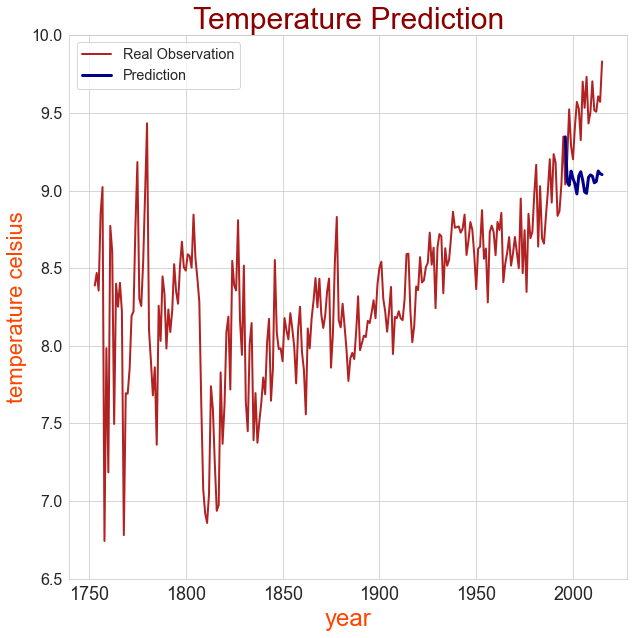

In [1607]:
dfy.plot(figsize=(10,10), linewidth=2, color='firebrick')
plt.plot(range(1996,2016), m_sarimax_foca, linewidth=3, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

<font color='darkblue'>__*As we can see, when taking the whole series data from year 1753, SARIMAX model does not work better than ARIMA model in yearly earth surface temperature prediction.*__ 

### 4.5 Now I need to use auto arima to find out the best model

In [1216]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.925)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.925):]
len(dfy_test)

20

In [1223]:
m_auto = pm.auto_arima(dfy_train, start_p=3, start_d=2, start_q=3, max_p=10, max_d=3, max_q=10,
                             seasonal = False,
                             d=None, D=None, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=173.432, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=230.997, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=199.555, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=181.687, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=229.023, Time=0.03 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=178.356, Time=0.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=175.767, Time=0.54 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=174.014, Time=0.70 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=180.195, Time=0.68 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=178.602, Time=0.24 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=178.308, Time=0.62 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=179.874, Time=0.39 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=182.196, Time=0.73 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=171.324, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=176.4

In [1224]:
m_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(3, 1, 3)   Log Likelihood                 -78.662
Date:                Mon, 10 Aug 2020   AIC                            171.324
Time:                        17:01:54   BIC                            195.746
Sample:                             0   HQIC                           181.162
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8218      0.060    -13.632      0.000      -0.940      -0.704
ar.L2         -0.2810      0.080     -3.502      0.000      -0.438      -0.124
ar.L3          0.4976      0.053      9.321      0.000       0.393       0.602
ma.L1          0.3470      0.053      6.578      0.000       0.244       0.450
ma.L2         -0.2352      0.053     -4.451      0.000      -0.339      -0.132
ma.L3         -0.8865      0.044    -20.145      0.000      -0.973      -0.800
sigma2         0.1110      0.006     17.514      0.000       0.099       0.123
===================================================================================
Ljung-Box (Q):                       58.80   Jarque-Bera (JB):               370.03
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                            -1.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1225]:
m_auto_foca = m_auto.predict(20)
print('MSE:', mean_squared_error(dfy_test, m_auto_foca))
print('RMSE:', np.sqrt(mean_squared_error(dfy_test, m_auto_foca)))
print('MAE:', mean_absolute_error(dfy_test, m_auto_foca))

MSE: 0.3379481754201482
RMSE: 0.5813331019477114
MAE: 0.5461803627030468


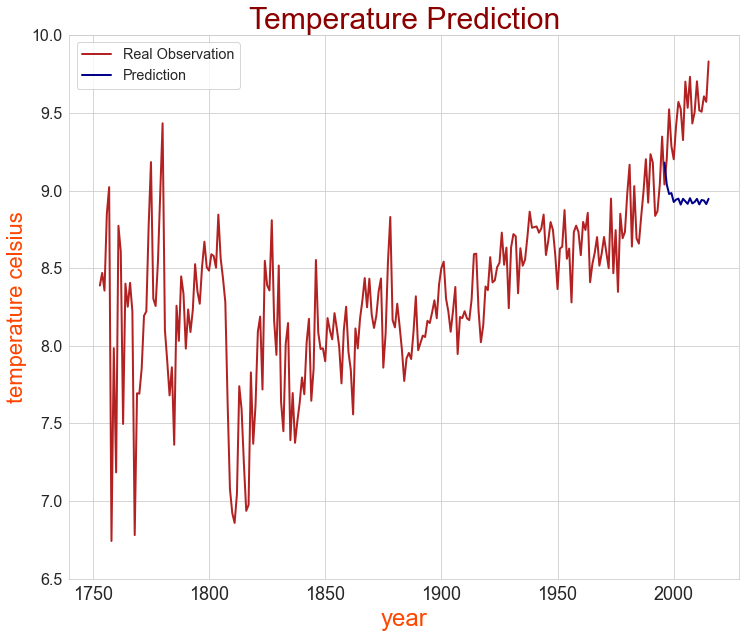

In [1226]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(1996,2016), m_auto_foca, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

<font color='darkblue'>__*Auto arima does not improve our forecasting. It seems that it does not automatically generate all the possible outcomes. So, grid search of the best hyperparameters can be a good approach.*__ 

### 4.6 Try grid search for hyperparameters with SARIMAX

__Now, try to go through all the possible order of arimax to see how accurate the recent 53 years temperature can be predicted.__

In [1630]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.8)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.8):]
len(dfy_test)

53

In [1637]:
orderlist = []
mselist = []
rmselist = []
maelist = []
for p in range(1,16):
    for d in range(1,3):
        for q in range(1,16):
            ordernow = (p,d,q)
            m_sarimax_now = sm.tsa.statespace.SARIMAX(endog = dfy_train, order=ordernow).fit()
            orderlist.append(ordernow)
            maelist.append(mean_absolute_error(dfy_test, m_sarimax_now.forecast(53)))
            rmselist.append(np.sqrt(mean_squared_error(dfy_test, m_sarimax_now.forecast(53))))
            mselist.append(mean_squared_error(dfy_test, m_sarimax_now.forecast(53)))

In [1638]:
df_sarimax = pd.DataFrame()
df_sarimax['order'], df_sarimax['mse'], df_sarimax['rmse'], df_sarimax['mae'] = orderlist, mselist, rmselist, maelist

In [1643]:
df_sarimax.sort_values('rmse').head()

,order,mse,rmse,mae
89,"(3, 2, 15)",0.075018,0.273894,0.232878
27,"(1, 2, 13)",0.077746,0.278830,0.238203
206,"(7, 2, 12)",0.078079,0.279427,0.237823
88,"(3, 2, 14)",0.078217,0.279673,0.239688
47,"(2, 2, 3)",0.078871,0.280840,0.243959


In [1649]:
sarimax_best = sm.tsa.statespace.SARIMAX(endog = dfy_train, order=(7,2,12)).fit()

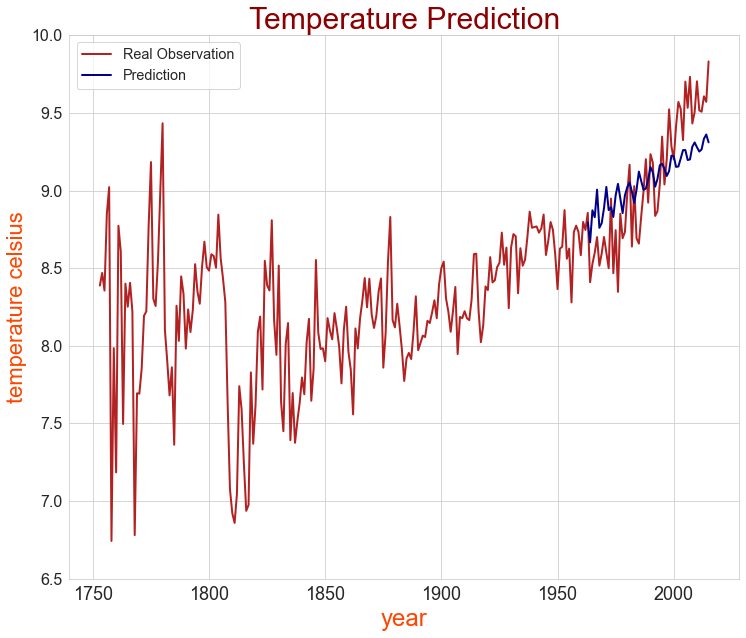

In [1650]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(1963,2016), sarimax_best.forecast(53), linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*Using grid search of the hyperparameters, the best (p, d, q) combinations and MAE, RMSE, MSE results are shown in the result dataframe 'df_sarimax'. The top are (3, 2, 15), (1, 2, 13), (7, 2, 12), (3, 2, 14) and (2, 2, 3), the RMSE error are similar for these orders. Best RMSE is 0.27, still not as good as ARIMA model in the previous section 4.2 . The above graph shows the prediction, definitely looks better than section 4.4 and 4.5 which were not grid-search-selected model.*__

## 5. Cointegration analysis and tests -- foundation of exogenous variables

__Cointegration is a technique used to find a possible correlation between times series processes in the long term. Nobel Laureate Robert Engle and Clive Granger introduced the concept of cointegration in 1987.__

But cointegration test is subject to asymptotic properties (large sample size) since a small sample size would produce unreliable results. Using the test to find cointegration of several time series avoids the issues created when errors are carried forward to the next step. 

Ho: there is no correlation(or cointegration) between earth surface temperature time series and carbon dioxide concentration time series (time index are the same). 


Ha: there is correlation between earth surface temperature time series and carbon dioxide concentration time series (time index are the same). 

### 5.1 Cointegration test between earth surface temperature and CO2 concentration with 'coint'

Define a function that perform the basic cointegration test. Try the cointegration test of land surface temperature and carbon dioxide concentration from year 1753.

In [1407]:
def cointest(y1, y2):
    results = ts.coint(y1, y2)
    print('t-statistic:', results[0])
    print('pvalue:', results[1])
    print('crit_value for 1%, 5% and 10%:', results[2])
cointest(dfy, df_co1753)

t-statistic: -5.993078321959256
pvalue: 1.680262764549626e-06
crit_value for 1%, 5% and 10%: [-3.93872956 -3.35955039 -3.06067741]


Try the cointegration test of land surface temperature and carbon dioxide concentration from 1950s to now.

In [1408]:
cointest(dfy[200:], df_co1753[200:]) # cointegration test for data from 1950s

t-statistic: -7.911700294762636
pvalue: 5.0310946320765677e-11
crit_value for 1%, 5% and 10%: [-4.08180545 -3.43645497 -3.11356405]


In [1409]:
cointest(dfy[210:], df_co1753[210:]) # cointegration test for data from 1960s

t-statistic: -1.8488549452784082
pvalue: 0.6057025871401402
crit_value for 1%, 5% and 10%: [-4.1194525  -3.45615522 -3.12701746]


In [1419]:
for i in range(20):
    print('CO2 pvalue counted from', str(1950+i), ':', ts.coint(dfy[197+i:], df_co1753[197+i:])[1])

CO2 pvalue counted from 1950 : 0.4271848354393155
CO2 pvalue counted from 1951 : 2.899490749433745e-10
CO2 pvalue counted from 1952 : 0.5627436566780093
CO2 pvalue counted from 1953 : 5.0310946320765677e-11
CO2 pvalue counted from 1954 : 0.4572807882079839
CO2 pvalue counted from 1955 : 0.24408676534744733
CO2 pvalue counted from 1956 : 0.32438841274503893
CO2 pvalue counted from 1957 : 0.6555231906545959
CO2 pvalue counted from 1958 : 0.6760721479648486
CO2 pvalue counted from 1959 : 0.5139203588960145
CO2 pvalue counted from 1960 : 0.48587199060162245
CO2 pvalue counted from 1961 : 2.3127890037385538e-10
CO2 pvalue counted from 1962 : 7.260423991353002e-11
CO2 pvalue counted from 1963 : 0.6057025871401402
CO2 pvalue counted from 1964 : 0.5651803878050315
CO2 pvalue counted from 1965 : 9.519126510442117e-11
CO2 pvalue counted from 1966 : 1.4183174346777867e-10
CO2 pvalue counted from 1967 : 1.1600564934190011e-10
CO2 pvalue counted from 1968 : 3.020953585210336e-10
CO2 pvalue counted 

<font color='darkblue'>__*As you can see from the above cointegration tests, in long term, null hypothesis can be rejected and it is determined that CO2 concentration is correlated to earth surface temperature. But for short amount the of time (around or less than 60 years), some tests show there is correlation, but it is more difficult to show correlation between earth surface temperature and carbon dioxide concentration. This is consistent with the fact that cointegration tests are subject to sample sizes.*__

### 5.2 Cointegration test between earth surface temperature and population with 'coint'

Using cointegration test to try to see the correlation of world population, world urban population or rural population and earth surface temperature for limited observations (data after 1950)

Ho: there is no correlation(or cointegration) between earth surface temperature time series and world population (total, urban, rural) time series (time index are the same). 

Ha: there is correlation between earth surface temperature time series and world population (total, urban, rural) time series (time index are the same). 

In [1415]:
for i in range(20):
    print('total population pvalue counted from', str(1950+i), ':', ts.coint(dfy[197+i:], df_pop.world[i:])[1])

total population pvalue counted from 1950 : 0.5668832254085909
total population pvalue counted from 1951 : 0.5983257331927587
total population pvalue counted from 1952 : 0.403455215313126
total population pvalue counted from 1953 : 0.44342817801603795
total population pvalue counted from 1954 : 0.441369355939004
total population pvalue counted from 1955 : 0.34151359802661696
total population pvalue counted from 1956 : 0.44073789060817364
total population pvalue counted from 1957 : 0.7510623429278261
total population pvalue counted from 1958 : 0.7568326495233766
total population pvalue counted from 1959 : 0.6023440089126857
total population pvalue counted from 1960 : 0.6175444277881242
total population pvalue counted from 1961 : 0.6385808579563845
total population pvalue counted from 1962 : 0.6765447737330171
total population pvalue counted from 1963 : 0.6740148791783029
total population pvalue counted from 1964 : 0.5895936107101567
total population pvalue counted from 1965 : 0.72217303

In [1416]:
for i in range(20):
    print('urban population pvalue counted from', str(1950+i), ':', ts.coint(dfy[197+i:], df_ur.urban[i:])[1])

urban population pvalue counted from 1950 : 0.4267469166623479
urban population pvalue counted from 1951 : 1.0678189974734031e-09
urban population pvalue counted from 1952 : 0.2685473011745285
urban population pvalue counted from 1953 : 1.0149982308265605e-10
urban population pvalue counted from 1954 : 0.4140602569473346
urban population pvalue counted from 1955 : 0.20240760339144181
urban population pvalue counted from 1956 : 0.28164764268800313
urban population pvalue counted from 1957 : 0.6189173962266246
urban population pvalue counted from 1958 : 0.6334299036951149
urban population pvalue counted from 1959 : 0.46395761217524
urban population pvalue counted from 1960 : 0.43777442529423666
urban population pvalue counted from 1961 : 0.5577304731127
urban population pvalue counted from 1962 : 0.550010730209034
urban population pvalue counted from 1963 : 0.5513054410959657
urban population pvalue counted from 1964 : 0.5299322700475224
urban population pvalue counted from 1965 : 0.1827

In [1417]:
for i in range(20):
    print('rural population pvalue counted from', str(1950+i), ':', ts.coint(dfy[197+i:], df_ur.rural[i:])[1])

rural population pvalue counted from 1950 : 0.746376106268449
rural population pvalue counted from 1951 : 0.7638772525596114
rural population pvalue counted from 1952 : 0.6401596049037055
rural population pvalue counted from 1953 : 0.683251429388022
rural population pvalue counted from 1954 : 0.756861654079504
rural population pvalue counted from 1955 : 0.8505282035897086
rural population pvalue counted from 1956 : 0.8601751189953866
rural population pvalue counted from 1957 : 0.8623206182086427
rural population pvalue counted from 1958 : 0.9429019168789295
rural population pvalue counted from 1959 : 0.905821438772638
rural population pvalue counted from 1960 : 0.9074975971026354
rural population pvalue counted from 1961 : 0.9400676306362135
rural population pvalue counted from 1962 : 0.7467472841333731
rural population pvalue counted from 1963 : 0.9414464730796723
rural population pvalue counted from 1964 : 0.925966882402801
rural population pvalue counted from 1965 : 0.85999277901925

<font color='darkblue'>__*Since I only have accurate data for world population, world urban population and rural population. As we can see from the above p-values list, although I only have limited observations, there is no test p-values showing correlation between world population & earth surface temperature, or rural population & earth surface temperature. So, for world total population and rural population, null hypothesis cannot be rejected. I is hard to say that total population or rural population is related to earth surface temperature changing. But there are some tests showing correlation betwen urban population and earth surface temperature.*__

<font color='darkblue'>*This means that it is urban population increase that may be correlated to earth surface temperature change. So, in future analysis to improve the time series model forecasting earth surface temperature, urban population can be taken into consideration.* __This result makes perfect sense socially and technically.__

### 5.3 Cointegration test with coint Johansen

5.3.1 Run coint_Johansen test to see the correlation of carbon dioxide concentration and earth surface temperature.

Ho: there is no correlation(or cointegration) between earth surface temperature time series and carbon dioxide concentration (time index are the same). 

Ha: there is correlation between earth surface temperature time series and carbon dioxide concentration (time index are the same). 

In [1476]:
df_tc = pd.DataFrame(index=dfy.index)
df_tc['Temp'], df_tc['co2'] = dfy['LandAverageTemperature'], df_co1753.values

In [1477]:
coint_johansen(df_tc,0,1).lr1

array([118.99240907,  41.64554317])

In [1478]:
coint_johansen(df_tc,0,1).cvt

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

<font color='darkblue'>__*As shown here, the test statistics is higher than critical values for 90% confidence level, 95% confidence level and 99% confidence level. So, null hypothesis can be rejected and there is correlation between land surface temperature and carbon dioxide concentration. This correlation is confirmed by both Coint test and Johansen test*__

5.3.2 Run coint_Johansen test to see the correlation of carbon dioxide concentration and population 

Ho: there is no correlation(or cointegration) between earth surface temperature time series and population (time index are the same). 

Ha: there is correlation between earth surface temperature time series and population (time index are the same). 

In [1510]:
df_tp = pd.DataFrame(index=dfy[197:].index)
df_tp['Temp'], df_tp['population'] = dfy['LandAverageTemperature'][197:], df_pop.world.values

In [1511]:
coint_johansen(df_tp,0,1).lr1

array([30.51972775,  1.91290122])

In [1512]:
coint_johansen(df_tp,0,1).cvt

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

<font color='darkblue'>__*As shown here, the test statistics is less than critical values for 90% confidence level, 95% confidence level and 99% confidence level. So, null hypothesis cannot be rejected and there is no correlation between land surface temperature and world population. This is the same result as above.*__

## 6. Model improving -- ARIMAX with exogenous features, Grid Search

### 6.1 ARIMAX with CO2 as exogenous features

In [1610]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.8)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.8):]
df_co_train = df_co1753[:round(len(df_co1753)*0.8)]
df_co_test = df_co1753[round(len(df_co1753)*0.8):]
len(dfy_test), len(df_co_test)

(53, 53)

In [1611]:
m_arimax = sm.tsa.statespace.SARIMAX(dfy_train, exog=df_co_train, order=(8,1,16))
m_arimax_fit = m_arimax.fit()
print(m_arimax_fit.summary())

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                  210
Model:                  SARIMAX(8, 1, 16)   Log Likelihood                 -60.474
Date:                    Wed, 12 Aug 2020   AIC                            172.947
Time:                            14:40:02   BIC                            259.848
Sample:                                 0   HQIC                           208.082
                                    - 210                                         
Covariance Type:                      opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
data_mean_global     0.0164      0.015      1.110      0.267      -0.013       0.045
ar.L1               -0.7654      1.006     -0.761      0.447      -2.736       1.

/opt/anaconda3/envs/finalproject/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [1612]:
m_arimax_foca = m_arimax_fit.forecast(steps=53, exog=df_co_test)
print('MSE:', mean_squared_error(dfy_test, m_arimax_foca))
print('RMSE:', np.sqrt(mean_squared_error(dfy_test, m_arimax_foca)))
print('MAE:', mean_absolute_error(dfy_test, m_arimax_foca))

MSE: 0.06827689460271516
RMSE: 0.261298477995405
MAE: 0.2193447311130386


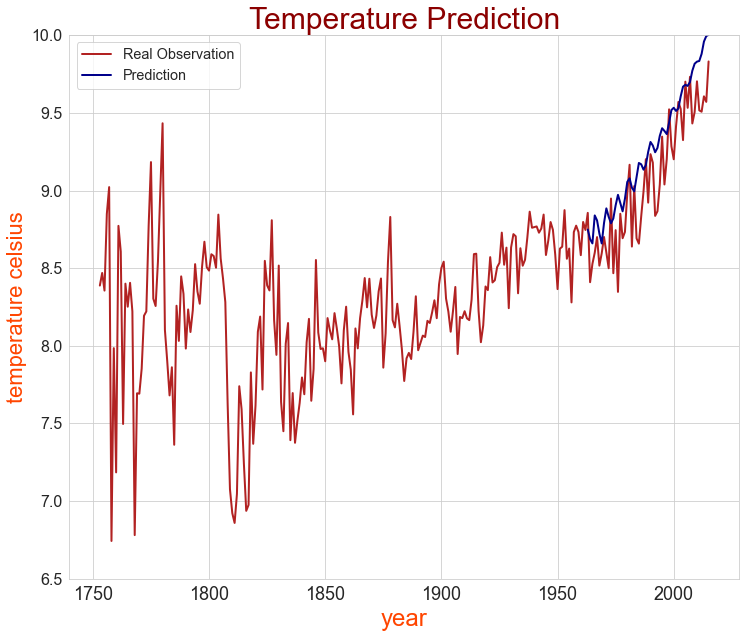

In [1613]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(1963,2016), m_arimax_foca, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*After adding exogenous features, the prediction results got improved. RMSE & MAE here are 0.26 & 0.21, the best RMSE & MAE are 0.27 & 0.23 in the grid search of regular SARIMAX model in section 4.6 . The prediction graph here also looks better than the one in section 4.6*__

### 6.2 Grid search to get best model in ARIMAX with CO2 as exogenous features

In [1652]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.8)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.8):]
df_co_train = df_co1753[:round(len(df_co1753)*0.8)]
df_co_test = df_co1753[round(len(df_co1753)*0.8):]
len(dfy_test), len(df_co_test)

(53, 53)

In [1654]:
orderlist1 = []
mselist1 = []
rmselist1 = []
maelist1 = []
for p in range(1,16):
    for d in range(1,3):
        for q in range(1,16):
            ordernow = (p,d,q)
            m_arimax_exo_now = sm.tsa.statespace.SARIMAX(endog = dfy_train, exog=df_co_train, order=ordernow,
                                                         initialization='approximate_diffuse').fit()
            orderlist1.append(ordernow)
            foca_now = m_arimax_exo_now.forecast(steps=53, exog=df_co_test)
            maelist1.append(mean_absolute_error(dfy_test, foca_now))
            rmselist1.append(np.sqrt(mean_squared_error(dfy_test, foca_now)))
            mselist1.append(mean_squared_error(dfy_test, foca_now))

In [1657]:
df_arimax_exo = pd.DataFrame()
df_arimax_exo['order'], df_arimax_exo['mse'], df_arimax_exo['rmse'], df_arimax_exo['mae'] = orderlist1, mselist1, rmselist1, maelist1

In [1658]:
df_arimax_exo.sort_values('rmse').head()

,order,mse,rmse,mae
154,"(6, 1, 5)",0.032913,0.181420,0.153252
330,"(12, 1, 1)",0.039023,0.197543,0.162295
242,"(9, 1, 3)",0.041362,0.203376,0.165830
245,"(9, 1, 6)",0.043820,0.209333,0.176070
335,"(12, 1, 6)",0.045054,0.212260,0.176334


In [1670]:
arimax_exo_best = sm.tsa.statespace.SARIMAX(endog = dfy_train, exog=df_co_train, order=(6,1,5), initialization='approximate_diffuse').fit()

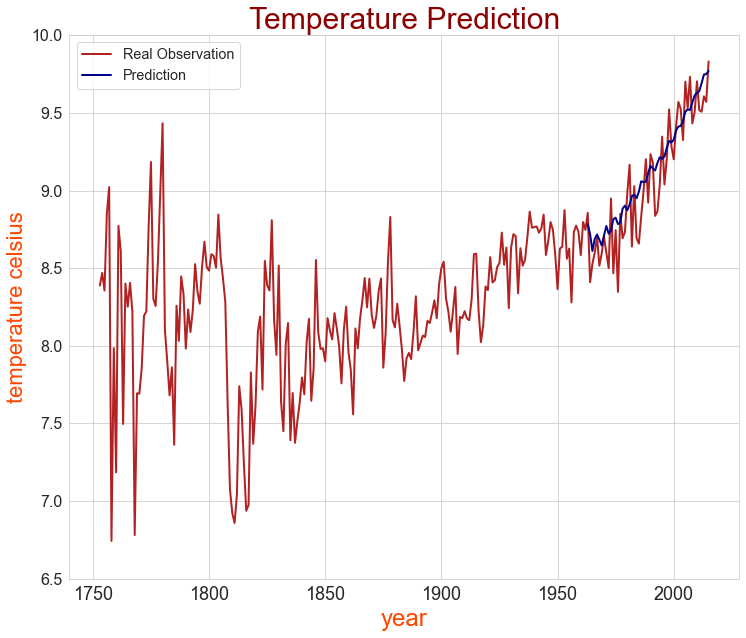

In [1671]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(1963,2016), arimax_exo_best.forecast(steps=53, exog=df_co_test), linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*Comparing to modeling in section 4.6 (grid search of SARIMAX), ARIMAX with CO2 concentration as exogenous features greatly improved the model predict. As you can see, best RMSE & MAE values are 0.27 & 0.23 in section 4.6, while here using ARIMAX with CO2 exogenous feature best RMSE & MAE values are 0.18 & 0.15. This verifies that CO2 concentration are very correlated with earth surface temperature change and can help the temperature prediction.*__

### 6.3 Use CO2 concentration as exogenous features since year 1950

Since I only have the world urban population since year 1950. I will work on the year range 1950 to 2015 to see how time series of CO2 concentration and world urban population can influence the earth surface forecast. Firstly, try only CO2 concentration as exogenous features.

In [1730]:
df_tcr = pd.DataFrame(index=dfy['LandAverageTemperature'][197:].index)
df_tcr['Temp'], df_tcr['co2'], df_tcr['urban'] = dfy['LandAverageTemperature'][197:], df_coh['data_mean_global'][1950:], df_ur['urban'].values

In [1731]:
round(len(df_tcr)*0.8), len(df_tcr)-round(len(df_tcr)*0.8)

(53, 13)

In [1732]:
temp_train = df_tcr.Temp[:53]
temp_test = df_tcr.Temp[53:]
co2_train = df_tcr.co2[:53]
co2_test = df_tcr.co2[53:]
urban_train = df_tcr.urban[:53]
urban_test = df_tcr.urban[53:]

In [1753]:
orderlist2 = []
mselist2 = []
rmselist2 = []
maelist2 = []
for p in range(1,13):
    for d in range(1,3):
        for q in range(1,13):
            ordernow = (p,d,q)
            m_arimax_co2_now = sm.tsa.statespace.SARIMAX(endog = temp_train, exog=co2_train, order=ordernow,
                                                         initialization='approximate_diffuse').fit()
            orderlist2.append(ordernow)
            foca_now = m_arimax_co2_now.forecast(steps=13, exog=co2_test)
            maelist2.append(mean_absolute_error(temp_test, foca_now))
            rmselist2.append(np.sqrt(mean_squared_error(temp_test, foca_now)))
            mselist2.append(mean_squared_error(temp_test, foca_now))

In [1754]:
df_arimax_co2 = pd.DataFrame()
df_arimax_co2['order'], df_arimax_co2['mse'], df_arimax_co2['rmse'], df_arimax_co2['mae'] = orderlist2, mselist2, rmselist2, maelist2

In [1776]:
df_arimax_co2.sort_values('rmse').head()

,order,mse,rmse,mae
75,"(4, 1, 4)",0.015492,0.124467,0.110357
51,"(3, 1, 4)",0.016604,0.128856,0.119590
25,"(2, 1, 2)",0.016652,0.129041,0.113589
28,"(2, 1, 5)",0.016928,0.130109,0.116897
52,"(3, 1, 5)",0.017126,0.130868,0.103234


In [1777]:
df_arimax_co2.sort_values('mae').head()

,order,mse,rmse,mae
52,"(3, 1, 5)",0.017126,0.130868,0.103234
53,"(3, 1, 6)",0.017508,0.132318,0.104525
2,"(1, 1, 3)",0.019461,0.139502,0.108104
77,"(4, 1, 6)",0.020331,0.142588,0.109551
74,"(4, 1, 3)",0.018731,0.136862,0.109992


In [1765]:
arimax_co2_best = sm.tsa.statespace.SARIMAX(endog = temp_train, exog=co2_train, order=(3,1,4), initialization='approximate_diffuse').fit()

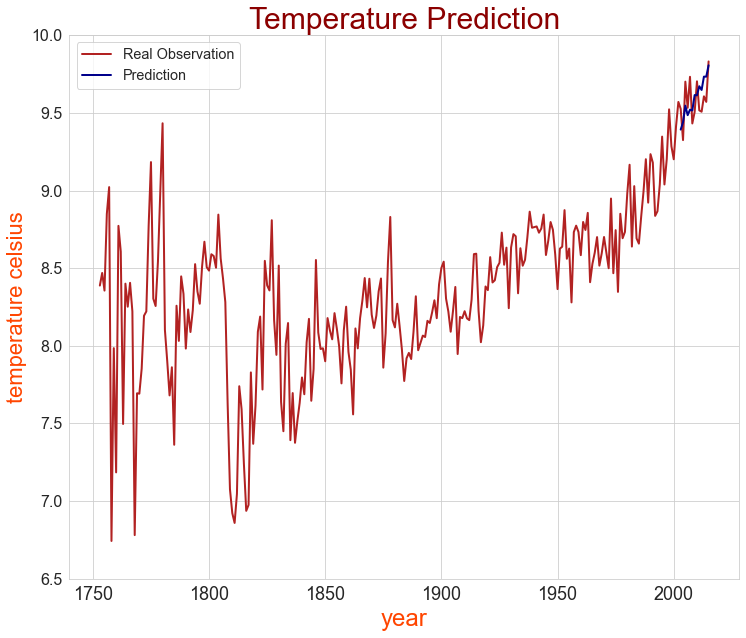

In [1766]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(2003,2016), arimax_co2_best.forecast(steps=13, exog=co2_test), linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*Comparing to modelings in section 4.1 and 4.2, using recent 66 years data, ARIMAX with CO2 concentration as exogenous features still improved the model predict. As you can see, best RMSE values are 0.13 in section 4.1 and 4.2, while here using ARIMAX with CO2 exogenous feature the best RMSE values is 0.12. This verifies again that CO2 concentration are very correlated with earth surface temperature change and can help the temperature prediction.*__
    
__Now, let's try if adding urban population can further improve the model!__

### 6.4 Use both CO2 concentration and world urban population as exogenous features since year 1950

In [1770]:
orderlist3 = []
mselist3 = []
rmselist3 = []
maelist3 = []
for p in range(1,13):
    for d in range(1,3):
        for q in range(1,13):
            ordernow = (p,d,q)
            m_arimax_co2ur_now = sm.tsa.statespace.SARIMAX(endog = temp_train, exog=df_tcr[['co2','urban']][:53],
                                                          order=ordernow, initialization='approximate_diffuse').fit()
            orderlist3.append(ordernow)
            foca_now = m_arimax_co2ur_now.forecast(steps=13, exog=df_tcr[['co2','urban']][53:])
            maelist3.append(mean_absolute_error(temp_test, foca_now))
            rmselist3.append(np.sqrt(mean_squared_error(temp_test, foca_now)))
            mselist3.append(mean_squared_error(temp_test, foca_now))

In [1771]:
df_arimax_co2ur = pd.DataFrame()
df_arimax_co2ur['order'], df_arimax_co2ur['mse'], df_arimax_co2ur['rmse'], df_arimax_co2ur['mae'] = orderlist3, mselist3, rmselist3, maelist3

In [1774]:
df_arimax_co2ur.sort_values('mae').head()

,order,mse,rmse,mae
249,"(11, 1, 10)",0.017648,0.132847,0.094773
137,"(6, 2, 6)",0.017126,0.130866,0.104857
147,"(7, 1, 4)",0.016943,0.130165,0.119012
193,"(9, 1, 2)",0.019019,0.137910,0.119341
78,"(4, 1, 7)",0.017988,0.134119,0.119663


In [1775]:
df_arimax_co2ur.sort_values('rmse').head()

,order,mse,rmse,mae
147,"(7, 1, 4)",0.016943,0.130165,0.119012
137,"(6, 2, 6)",0.017126,0.130866,0.104857
249,"(11, 1, 10)",0.017648,0.132847,0.094773
125,"(6, 1, 6)",0.017809,0.133450,0.122379
78,"(4, 1, 7)",0.017988,0.134119,0.119663


In [1784]:
arimax_co2ur_best = sm.tsa.statespace.SARIMAX(endog = temp_train, exog=df_tcr[['co2','urban']][:53], order=(11,1,10), initialization='approximate_diffuse').fit()

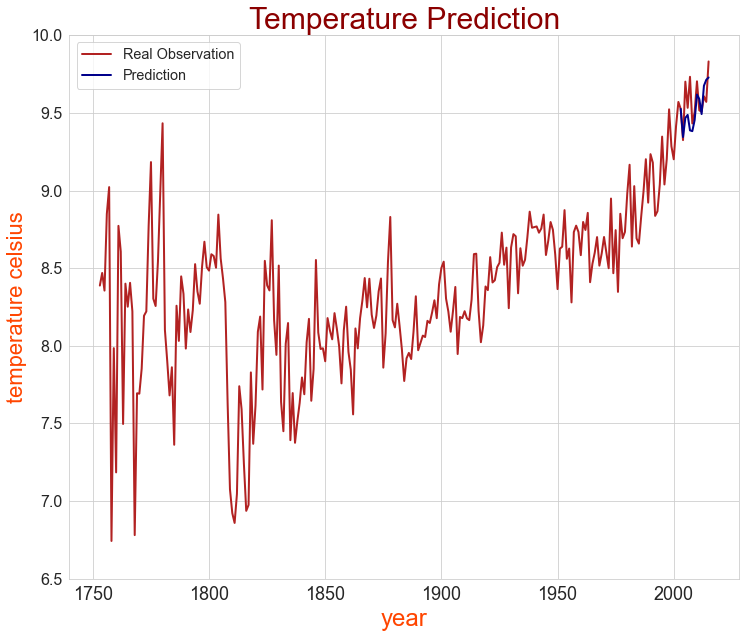

In [1785]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(2003,2016), arimax_co2ur_best.forecast(steps=13,exog=df_tcr[['co2','urban']][53:]), linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*Comparing to the previous ARIMAX model with only CO2 exogenous feature, adding both CO2 and urban population features have reached similar minimum RMSE value but <font color='purple'>does improve the MAE, and this time I reached to the minimum MAE 0.09. Up to now, the ARIMAX model is very very accurate.*__
    
__<font color='purple'>*Up to now, the model is very accurate. Best 2 models have (RMSE:0.13, MAE:0.09) and (RMSE:0.12, MAE:0.11). For year 2003 to 2015, the average earth surface temperature is 9.58°C, so the prediction errors are really tiny.*__

## 7. Granger Causality analysis and explanation -- foundation of multivariates

The Granger causality test is a statistical hypothesis test for determing whether one time series is useful in forecasting another. It is developed by Clive Granger, Nobel Laureate, Economist. Although it is called 'Granger causality', using the term 'causality' alone is misnomer, as Granger-causality is better described as 'precedence'(Granger called it as 'temporally related' in 1977). A time series X is said to Granger-cause Y if it can be shown that X values provide statistically significant information about future values of Y. 

The assumption of Vector Auto Regression is that time series data in a system are influencing each other. So, before using Vector Auto Regression, it is better to do Granger Causality analysis and see the relationship before building the model. 

Since I have earth surface temperature and CO2 from year 1753 to 2015, but only have urban population data from 1950. So I can have 2 sets of Granger Causality analysis

### 7.1 Granger Causality analysis of earth surface temperature and CO2 concentration from 1753 to 2015.

In [1873]:
maxlag=12
# define the Granger Causality test function
def grangers_causation_matrix(data, variables, test3='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df3 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df3.columns:
        for r in df3.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test3][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df3.loc[r, c] = min_p_value
    df3.columns = [var + '_x' for var in variables]
    df3.index = [var + '_y' for var in variables]
    return df3
 

In [1874]:
grangers_causation_matrix(data = df_tc, variables = df_tc.columns)

,Temp_x,co2_x
Temp_y,1.0000,0.0
co2_y,0.1971,1.0


__<font color='darkblue'>*Ho: one time series data does not have influence on another time series data. Ha: one time series data influences another time series data.*__

__<font color='darkblue'>*Since the earth surface temperature data and CO2 concentration time series data are not stationary, and will be stationary after 1st order differencing, grangers causality was tried twice for original time serires and 1st order differencing. The results make sense. In first result, 0.0 represents the p-value of that CO2 concentration observations causing earth surface temperature. 0.0 is less than significance level 0.05, So we can reject the null hypothesis and conclude that CO2 concentration influences earth surface temperature. On the other hand, 0.19 represents the p-value of that earth surface temperature causing CO2 concentration. 0.197 is larger than significance level 0.05. So, we can see that earth surface temperature is not influencing back to CO2 concentration as much as the influence of CO2 onto earth surface temperature.*__ 

In [1875]:
df_tc_diff = df_tc.diff()

In [1876]:
grangers_causation_matrix(data = df_tc_diff[1:], variables = df_tc_diff[1:].columns)

,Temp_x,co2_x
Temp_y,1.0000,0.1275
co2_y,0.1751,1.0000


__<font color='darkblue'>*By running Granger Causality analysis on the 1st order differencing, similar results can be found. The results still make sense. 0.12 represents the p-value of that CO2 concentration observations causing earth surface temperature. It is smaller than the p-value (0.17) of that earth surface temperature influence back to CO2 concentration. So both original data test and differenced data test showed CO2 concentration influence the earth surface temperature much more than earth surface temperature influence backward to CO2 concentration.*__ 

### 7.2 Granger Causality analysis of earth surface temperature, CO2 concentration, urban population from 1750 to 2015.

In [1878]:
grangers_causation_matrix(data = df_tcr, variables = df_tcr.columns)

,Temp_x,co2_x,urban_x
Temp_y,1.0000,0.0,0.0
co2_y,0.0006,1.0,0.0
urban_y,0.0000,0.0,1.0


__<font color='darkblue'>*Of course the number of yearly observations from year 1750 to 2015 are not enough (66 observations). Which means that few observations can cause high uncertainty in Granger Causality estimation.*__
    
__<font color='darkblue'>*But here, running Granger Causality analysis on 3 variables (temperature, CO2 concentration, urban population from 1750 to 2015) still gives consistent results as in section 7.1. The results show that multivariates influence each other. CO2 concentration and urban population influence earth surface temperature more than earth surface temperature influences backwards to CO2 concentration and urban population.*__
    
__<font color='purple'>*Thus, the Granger Causality analysis results are consistent in 7.1 and 7.2. Therefore, I can continue with next section -- Multivariate Time Series Vector Auto Regression.*__

## 8. More models -- Vector Auto Regression (VAR) and Grid Search for multivariate time series

### 8.1 Discussion of application of Vector Auto Regression

Discussion about applying multivariate time series models and stationarity. Before multivariate time series models are applied to the data, one important question must be analyzed: "is it necessary to ensure stationarity of all times series variables before running Vector Autoregressive Model??" 

According to Chris Brooks (2014), in his book Introductory Econometrics for Finance, "If one wishes to use hypothesis tests, either singly or jointly, to examine the statistical significance of the coefficients, then it is essential that all of the components in the VAR are stationary."
But then he adds: "However, many proponents of the VAR approach recommend that differencing to induce stationarity should not be done. They would argue that the purpose of VAR estimation is purely to examine the relationships between the variables, and that differencing will throw information on any long-run relationships between the series away."

This question has been in controversy ever since Chris Sims (professor of Economics at Princeton University, won Nobel Price in 2011) in wrote "Macroeconomics and Reality" in 1980. Many people believe that series levels are non-stationary, then the regressions estimated involving the levels cannot be trusted (considered to be 'spurious regressions'). However, many people also argued that it is not necessary to have stationarity of all series before carrying out VAR and in fact, if you are interested in the nature of relationships between variables and not parameter estimates per se, estimating VAR with non-stationary variables may give important insights (Chris Sims suggested this point). So, it may be a good idea to estimate the model with time series variables in their original stationary forms. It is a matter of how to intepret the results. 

If people care about point estimate (if I am interested in 'point estimate' of relevant variables), non-stationary data can be a problem and there are 2 ways: (1) transforming a variable to stationarity, (2) adding sufficient number of lags. On the other hand, if people don't care about 'point estimate' of relevant variables, non-stationary data in VAR model is not a big issue (this view was supported by Chris Sims, James Stock, Mark Watson, etc). Also, when people's interest is on short run relationship among sereis, non-stationarity will result in spurious regressions (transforming the time series into first difference is a good way). If long run relationships is what people care about, then cointegration analysis can be firstly used and non-stationarity is not a big issue. Some professionals also argue that for non-stationary time series data, after ensure the cointegration with Coint test or Johansen method, Vector Error Correction Model (VECM) can be used (which combines levels and differences). 

<font color='purple'>__*Here, my goal is not to estimate single or few temperature points, but rather to predict more than 20 years data, and, I care more about the correlation between CO2 concentration, urban population and earth surface temperature and want to analyze the relationship as well as causality. Thus, I can use the Vector Auto Regression for my case, and, I will try Vector Error Correction Model (VECM) next.*__

### 8.2 VAR model with Earth surface temperature & CO2 concentration (multi-variables from year 1753)

In [1793]:
df_tc_train = df_tc[:round(len(dfy)*0.8)]
df_tc_test = df_tc[round(len(dfy)*0.8):]

In [1797]:
len(df_tc_train), len(df_tc_test)

(210, 53)

In [1799]:
m_multi_tc = VAR(endog=df_tc_train)

In [1927]:
laglist4 = []
mselist4 = []
rmselist4 = []
maelist4 = []
for i in ([None] + list(range(1,30))):
    m_multi_tc_fit = m_multi_tc.fit(i)
    foca_now = m_multi_tc_fit.forecast(m_multi_tc_fit.y, steps=53)[:,0]
    laglist4.append(i)
    maelist4.append(mean_absolute_error(df_tc_test['Temp'], foca_now))
    rmselist4.append(np.sqrt(mean_squared_error(df_tc_test['Temp'], foca_now)))
    mselist4.append(mean_squared_error(df_tc_test['Temp'], foca_now))

In [1928]:
df_multi_tc = pd.DataFrame()
df_multi_tc['lag'], df_multi_tc['mse'], df_multi_tc['rmse'], df_multi_tc['mae'] = laglist4, mselist4, rmselist4, maelist4

In [1931]:
df_multi_tc.sort_values('rmse').head()

,lag,mse,rmse,mae
2,2.0,0.056062,0.236773,0.204433
5,5.0,0.058439,0.241742,0.207781
4,4.0,0.059278,0.243470,0.210999
3,3.0,0.059355,0.243629,0.211043
12,12.0,0.060737,0.246449,0.211506


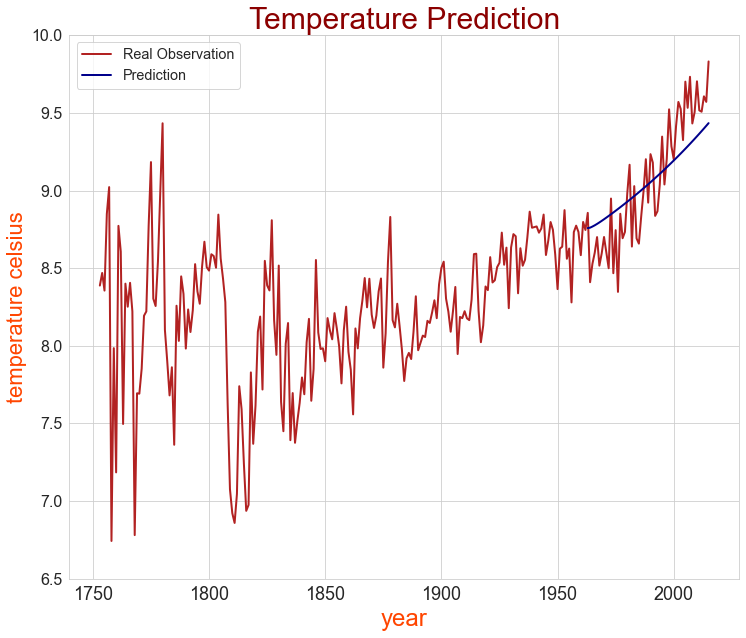

In [1936]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(1963,2016), m_multi_tc.fit(2).forecast(m_multi_tc.fit(2).y, steps=53)[:,0], linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*From the result in this section, we can see the prediction with Vector Auto Regression is not as good as section 6 (ARIMAX with exogenous features). Both RMSE and MAE are not as good as sectin 6. So this confirmed that my judgement that exogenous features will do better than Multivariate Time Series.*__
    
__<font color='purple'>*The reason that ARIMAX with exogenous features works better than VAR model in this case is that in reality, CO2 concentration, as the major greenhouse gas, affect the earth surface temperature, but the earth surface temperature does not affect back to CO2 concentration. This point is confirmed with Granger Causality analysis in section 7.1 (we can see that earth surface temperature is not influencing back to CO2 concentration as much as the influence of CO2 onto earth surface temperature.)*__

__<font color='purple'>*Vector Autogregression (VAR) is forecasting algorithm that can be used when tweo or more time series influence each other. ARIMAX with exogenous features uses CO2 concentration to help to assist earth surface temperature. Thus, logic of exogenous features useing CO2 definitely marke more sense than VAR model.*__

### 8.3 VAR model with differenced data of earth surface temperature & CO2 concentration

To make sure VAR model performance is not caused by non-stationary, now try fitting differenced time series data into model and tranform back after forecast and calculate the RMSE and MAE, and do graph again!

In [1977]:
df_tc_train_diff = df_tc_train.diff()[1:]

In [1978]:
m_multi_tc_diff = VAR(endog=df_tc_train_diff)

In [1979]:
laglist5 = []
mselist5 = []
rmselist5 = []
maelist5 = []
for i in ([None] + list(range(1,30))):
    m_multi_tc_diff_fit = m_multi_tc_diff.fit(i)
    foca_now = m_multi_tc_diff_fit.forecast(m_multi_tc_diff_fit.y, steps=53)[:,0]
    foca_now[0] += 8.745917
    for j in range(1, len(foca_now)):
        foca_now[j] += foca_now[j-1]
    laglist5.append(i)
    maelist5.append(mean_absolute_error(df_tc_test['Temp'], foca_now))
    rmselist5.append(np.sqrt(mean_squared_error(df_tc_test['Temp'], foca_now)))
    mselist5.append(mean_squared_error(df_tc_test['Temp'], foca_now))

In [1980]:
df_multi_tc_diff = pd.DataFrame()
df_multi_tc_diff['lag'], df_multi_tc_diff['mse'], df_multi_tc_diff['rmse'], df_multi_tc_diff['mae'] = laglist5, mselist5, rmselist5, maelist5

In [1981]:
df_multi_tc_diff.sort_values('rmse').head()

,lag,mse,rmse,mae
12,12.0,0.069907,0.264399,0.211403
9,9.0,0.083608,0.289151,0.249463
16,16.0,0.084970,0.291495,0.247855
14,14.0,0.087006,0.294968,0.238079
7,7.0,0.087628,0.296020,0.256490


In [1994]:
m_multi_tc_diff_fit = m_multi_tc_diff.fit(12)

In [1995]:
multi_pred = m_multi_tc_diff_fit.forecast(m_multi_tc_diff_fit.y, steps=53)[:,0]

In [1996]:
multi_pred[0] += 8.745917
for j in range(1, len(multi_pred)):
    multi_pred[j] += multi_pred[j-1]

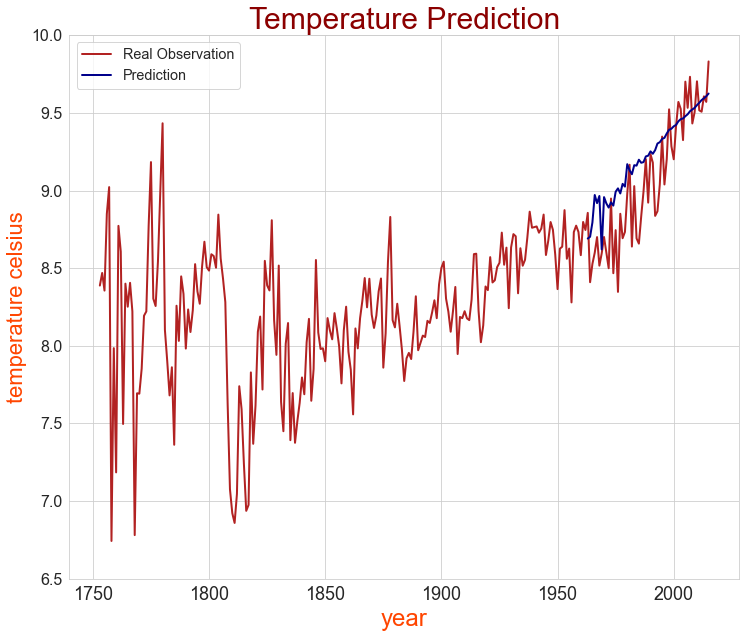

In [1997]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(1963,2016), multi_pred, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*Now you can see the results RMSE, MAE are not improved, graph is still not as good as section 6 (exogenous features). Thus, my conclusion is correct. VAR model does not perform as good as ARIMAX with exogenous variables, because the inner logic of this case.*__

## 9. More models -- Vector Error Correction Model (VECM) and Grid Search for multivariate time series

As mentioned in Section 8, some professionals also argue that for non-stationary time series data, after ensure the cointegration with Coint test or Johansen method (meaning there is correclation between multiple time series while they are not stationary), Vector Error Correction Model (VECM) can be used (which combines levels and fifferences). Now we can try VECM here.

### 9.1 VECM with Earth surface temperature & CO2 concentration (multi-variables from year 1753)

In [1999]:
df_tc_train = df_tc[:round(len(dfy)*0.8)]
df_tc_test = df_tc[round(len(dfy)*0.8):]

In [2001]:
len(df_tc_train), len(df_tc_test)

(210, 53)

In [2021]:
hyperlist6 = []
mselist6 = []
rmselist6 = []
maelist6 = []
for d in range(1,30):
    for de in ['nc','co','ci','lo','li']:
        m_vecm_tc = VECM(endog=df_tc_train, k_ar_diff=d, deterministic=de, coint_rank=1)
        m_vecm_tc_fit= m_vecm_tc.fit(method='ml')
        pred_vecm = m_vecm_tc_fit.predict(steps=53)[:,0]
        hyperlist6.append((d, de))
        maelist6.append(mean_absolute_error(df_tc_test['Temp'], pred_vecm))
        rmselist6.append(np.sqrt(mean_squared_error(df_tc_test['Temp'], pred_vecm)))
        mselist6.append(mean_squared_error(df_tc_test['Temp'], pred_vecm))

In [2047]:
df_vecm_tc = pd.DataFrame()
df_vecm_tc['hyper'], df_vecm_tc['mse'], df_vecm_tc['rmse'], df_vecm_tc['mae'] = hyperlist6, mselist6, rmselist6, maelist6

In [2048]:
df_vecm_tc.sort_values('rmse').head()

,hyper,mse,rmse,mae
30,"(7, nc)",0.034986,0.187046,0.153980
20,"(5, nc)",0.035290,0.187857,0.152373
35,"(8, nc)",0.036069,0.189918,0.159306
25,"(6, nc)",0.036727,0.191643,0.153780
40,"(9, nc)",0.038557,0.196360,0.166242


In [2049]:
df_vecm_tc.sort_values('mae').head()

,hyper,mse,rmse,mae
20,"(5, nc)",0.035290,0.187857,0.152373
25,"(6, nc)",0.036727,0.191643,0.153780
30,"(7, nc)",0.034986,0.187046,0.153980
35,"(8, nc)",0.036069,0.189918,0.159306
45,"(10, nc)",0.040752,0.201870,0.164770


In [2034]:
m_vecm_tc_best = VECM(endog=df_tc_train, k_ar_diff=7, deterministic='nc', coint_rank=1)
m_vecm_tc_bestfit= m_vecm_tc_best.fit(method='ml')
pred_vecm_best = m_vecm_tc_bestfit.predict(steps=53)[:,0]

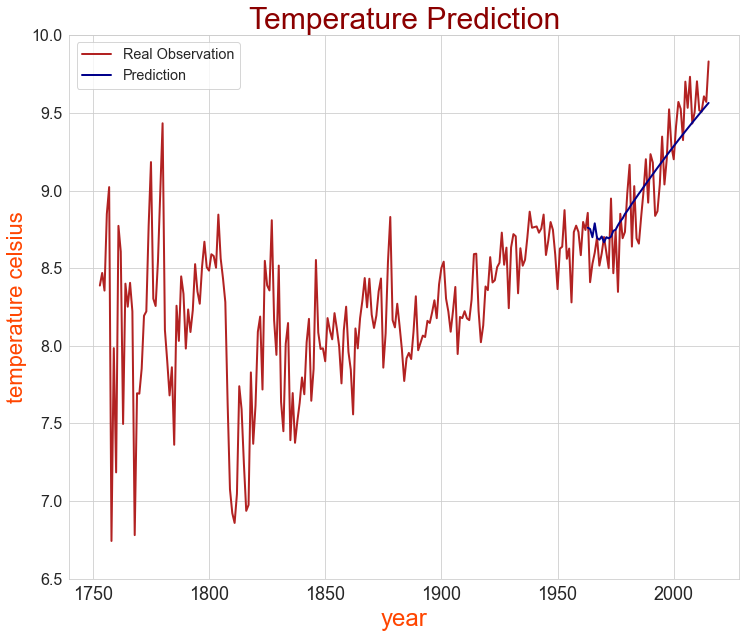

In [2035]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(1963,2016), pred_vecm_best, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*From this VECM model (temperature with CO2 concentration) results, we can see that the RMSE and MAE are almost as good as the section 6.2 (ARIMAX with exogenous features). The prediction graph derived by VECM model is good although not as good as in section 6.2. The VECM model gives much better results than VAR model in Section 8. This makes perfect sense, since for non-stationary time series data, after ensure the cointegration with Coint test or Johansen method, VECM basically combines stationary levels (VECM imposes additional restriction due to the existence of non-stationary but co-integrated data forms and utilize co-integration restriction infromation into its specifications) and differences from all time series. Thus, the performance of VECM model is much more better than VAR.*__

### 9.2 VECM with Earth surface temperature & CO2 concentration & urban population from year 1950

In [2038]:
round(len(df_tcr)*0.8), len(df_tcr)-round(len(df_tcr)*0.8)

(53, 13)

In [2041]:
df_tcr_train = df_tcr[:53]
df_tcr_test = df_tcr[53:]

In [2046]:
hyperlist7 = []
mselist7 = []
rmselist7 = []
maelist7 = []
for d in range(1,30):
    for de in ['nc','co','ci','lo','li']:
        m_vecm_tcr = VECM(endog=df_tcr_train, k_ar_diff=d, deterministic=de, coint_rank=1)
        m_vecm_tcr_fit= m_vecm_tcr.fit(method='ml')
        pred_vecm_tcr = m_vecm_tcr_fit.predict(steps=13)[:,0]
        hyperlist7.append((d, de))
        maelist7.append(mean_absolute_error(df_tcr_test['Temp'], pred_vecm_tcr))
        rmselist7.append(np.sqrt(mean_squared_error(df_tcr_test['Temp'], pred_vecm_tcr)))
        mselist7.append(mean_squared_error(df_tcr_test['Temp'], pred_vecm_tcr))

In [2050]:
df_vecm_tcr = pd.DataFrame()
df_vecm_tcr['hyper'], df_vecm_tcr['mse'], df_vecm_tcr['rmse'], df_vecm_tcr['mae'] = hyperlist7, mselist7, rmselist7, maelist7

In [2052]:
df_vecm_tcr.sort_values('rmse').head()

,hyper,mse,rmse,mae
10,"(3, nc)",0.015965,0.126353,0.105007
7,"(2, ci)",0.017762,0.133273,0.110941
15,"(4, nc)",0.019813,0.140760,0.121020
5,"(2, nc)",0.020370,0.142725,0.108741
20,"(5, nc)",0.020664,0.143748,0.125399


In [2053]:
df_vecm_tcr.sort_values('mae').head()

,hyper,mse,rmse,mae
10,"(3, nc)",0.015965,0.126353,0.105007
5,"(2, nc)",0.020370,0.142725,0.108741
24,"(5, li)",0.023241,0.152450,0.110642
7,"(2, ci)",0.017762,0.133273,0.110941
2,"(1, ci)",0.021140,0.145397,0.116805


In [2054]:
m_vecm_tcr_best = VECM(endog=df_tcr_train, k_ar_diff=3, deterministic='nc', coint_rank=1)
m_vecm_tcr_bestfit= m_vecm_tcr_best.fit(method='ml')
pred_vecm_tcr_best = m_vecm_tcr_bestfit.predict(steps=13)[:,0]

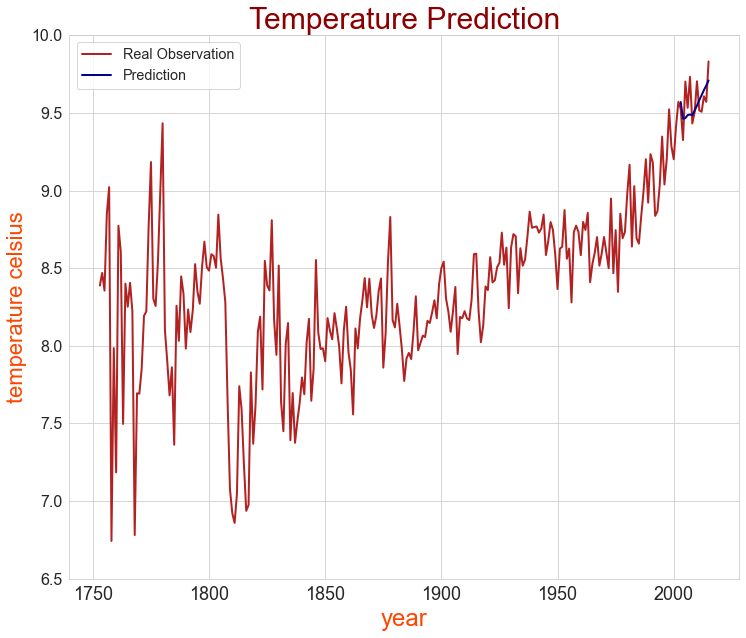

In [2056]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(2003,2016), pred_vecm_tcr_best, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*The result using VECM with temperature, CO2 concentration and urban population in VECM model give very accurate estimation of the 13 years earth surface temperature forecast (2003 -2015). The result is almost as good as the result in Section 6.3 and 6.4 (ARIMAX models with exogenous features). This again verifies that the VECM model works much better than the VAR model in Section 8 in my case. Because VECM basically combines stationary levels and differences from all time series, so VECM mitigate the non-stationary influence and utilizes the cointegration between several non-stationary time series with similar trend. This is very important.*__

## 10. More models -- Fbprophet

### 10.1 Fbprophet with pure earth surface temperature from year 1753 (predicting 53 years)

In [2220]:
dfyear = pd.DataFrame(index=range(0,263))
dfyear['ds'], dfyear['y'] = dfy.index, dfy['LandAverageTemperature'].values
dfyear['ds'] = dfyear['ds'].map(lambda x: str(x)+'-6-30')
dfyear['ds'] = pd.to_datetime(dfyear['ds'])
dfyear.head()

,ds,y
0,1753-06-30,8.388083
1,1754-06-30,8.469333
2,1755-06-30,8.355583
3,1756-06-30,8.849583
4,1757-06-30,9.022000


In [2221]:
t_year_train = dfyear[:210]
t_year_test = dfyear[210:]

In [2072]:
from fbprophet import Prophet

In [2222]:
m_pro = Prophet()
m_pro.fit(t_year_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [2223]:
future_pro = m_pro.make_future_dataframe(periods=53, freq = '12M')
future_pro.tail()

,ds
258,2011-06-30
259,2012-06-30
260,2013-06-30
261,2014-06-30
262,2015-06-30


In [2265]:
foca_pro = m_pro.predict(t_year_test)
foca_pro[['ds','trend','yhat_lower','yhat_upper','yhat']].tail()

,ds,trend,yhat_lower,yhat_upper,yhat
48,2011-06-30,9.446071,8.560783,9.619949,9.090324
49,2012-06-30,9.453743,8.653370,9.674849,9.132776
50,2013-06-30,9.461395,8.589606,9.603870,9.128101
51,2014-06-30,9.469046,8.626597,9.636597,9.124155
52,2015-06-30,9.476698,8.646088,9.580633,9.120950


In [2225]:
print('RMSE:', np.sqrt(mean_squared_error(dfyear.y[210:], foca_pro.yhat)))

RMSE: 0.32962216849431847


In [2226]:
print('MAE:', mean_absolute_error(dfyear.y[210:], foca_pro.yhat))

MAE: 0.27686526155977087


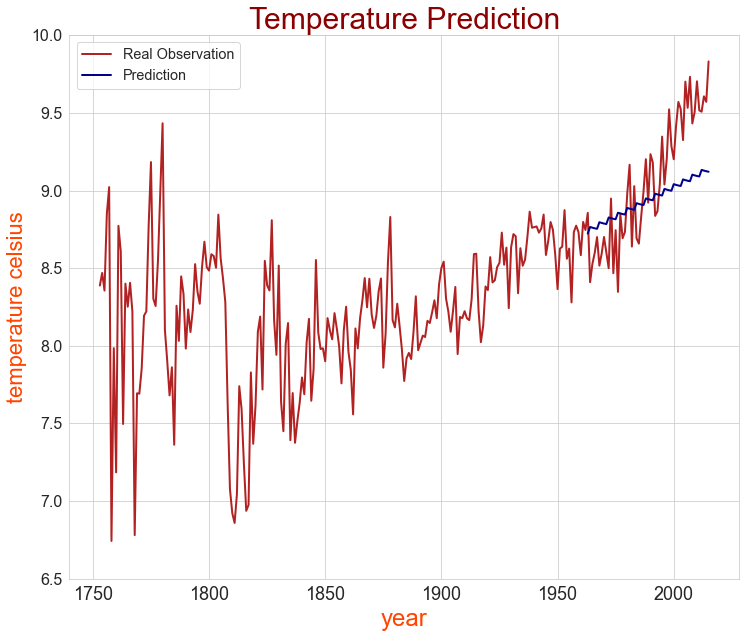

In [2227]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(1963,2016), foca_pro.yhat, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*The above results and graph with Fbprophet model are not as good as ARIMAX model and VECM model. We can see the temperature forecast starts at the right position, but does not ascend with expected rate. Next, let's try to see if forecasting less years will work better.*__

### 10.2 Fbprophet with pure earth surface temperature from year 1753 (predicting 13 years)

In [2115]:
t_year_train1 = dfyear[:250]
t_year_test1 = dfyear[250:]

In [2116]:
len(t_year_train1), len(t_year_test1)

(250, 13)

In [2117]:
m_pro1 = Prophet()
m_pro1.fit(t_year_train1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [2119]:
future_pro1 = m_pro1.make_future_dataframe(periods=13, freq='y')
future_pro1.tail()

,ds
258,2010-12-31
259,2011-12-31
260,2012-12-31
261,2013-12-31
262,2014-12-31


In [2266]:
foca_pro1 = m_pro1.predict(future_pro1)
foca_pro1[['ds','trend','yhat_lower','yhat_upper','yhat']].tail()

,ds,trend,yhat_lower,yhat_upper,yhat
258,2010-12-31,9.848582,8.540030,9.483685,9.015965
259,2011-12-31,9.857493,8.535551,9.440706,8.994037
260,2012-12-31,9.866428,8.591689,9.569758,9.100451
261,2013-12-31,9.875338,8.607594,9.532621,9.075225
262,2014-12-31,9.884249,8.600886,9.544263,9.051631


__upper prediction is more close to the actual temperature value, so use the upper prediction__

In [2186]:
print('RMSE:', np.sqrt(mean_squared_error(dfyear.y[250:], foca_pro1.yhat_upper[250:])))

RMSE: 0.14863536771312247


In [2187]:
print('MAE:', mean_absolute_error(dfyear.y[250:], foca_pro1.yhat_upper[250:]))

MAE: 0.10097900070068878


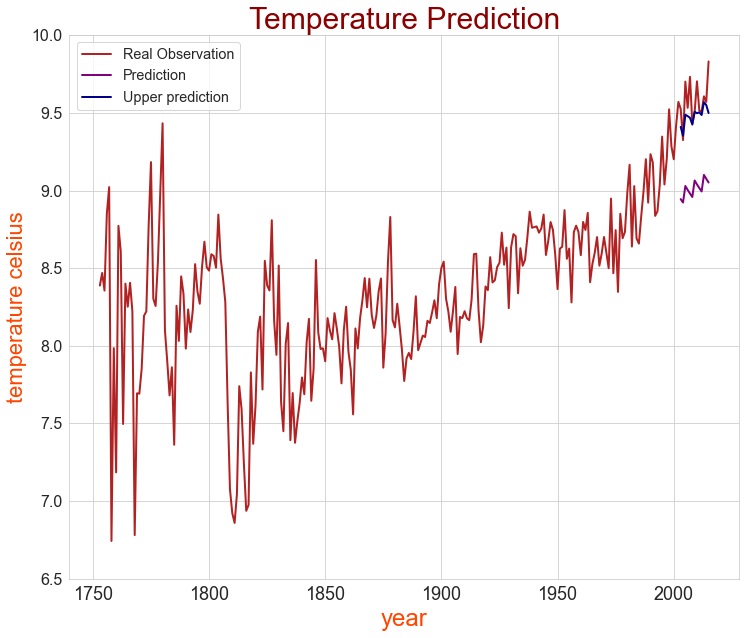

In [2192]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(2003,2016), foca_pro1.yhat[250:], linewidth=2, color='purple')
plt.plot(range(2003,2016), foca_pro1.yhat_upper[250:], linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction', 'Upper prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*With only 13 years forecasting and all previous year data training, the forecasting by Fbprophet model is still not as good as previous models. But, if 'yhat_upper' result in prophet model is used, the prediction is better.(in prophet results 'yhat_upper' and 'yhat_lower' are the ceiling forecast and bottom forecast in the range)*__

### 10.3 Fbprophet with additional regressors (CO2 data) from 1753 (predicting 53 years)

This time, try to see if adding CO2 data as additional regressor can help Fbprophet modeling

In [2218]:
tc_year_train = dfyear[:210]
tc_year_test = dfyear[210:]
tc_year_train['co2'] = df_co1753.values[:210]
tc_year_test['co2'] = df_co1753.values[210:]

In [2200]:
m_pro_tc = Prophet()
m_pro_tc.add_regressor('co2')
m_pro_tc.fit(tc_year_train)
future_tc_pro = m_pro_tc.make_future_dataframe(periods=53, freq = '12M')
foca_tc_pro = m_pro_tc.predict(tc_year_test)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(67.75, 0.5, 'Temperature')

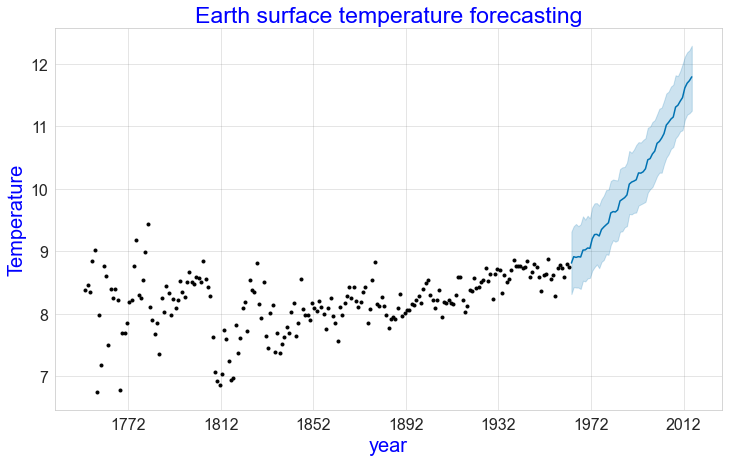

In [2274]:
m_pro_tc.plot(foca_tc_pro);
plt.title('Earth surface temperature forecasting', fontsize=23, color='blue')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('year', fontsize=20, color='blue')
plt.ylabel('Temperature', fontsize=20, color='blue')

In [2213]:
print('RMSE:', np.sqrt(mean_squared_error(dfyear.y[210:], foca_tc_pro.yhat_lower)))

RMSE: 0.7800889954568899


In [2214]:
print('MAE:', mean_absolute_error(dfyear.y[210:], foca_tc_pro.yhat_lower))

MAE: 0.6232537958787294


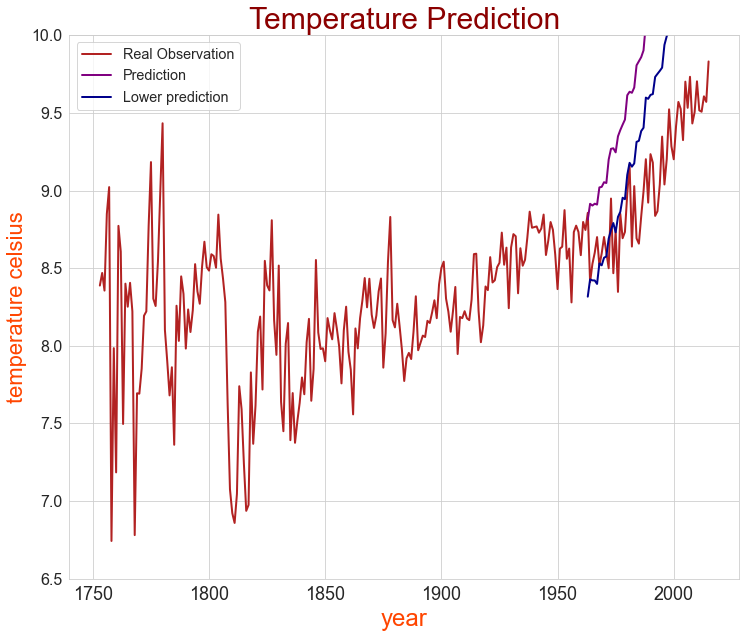

In [2216]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(1963,2016), foca_tc_pro.yhat, linewidth=2, color='purple')
plt.plot(range(1963,2016), foca_tc_pro.yhat_lower, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction', 'Lower prediction'), loc='upper left', fontsize='x-large')

__<font color='darkblue'>*With CO2 concentration data added as additional regressors, the model is not improved. We can see from the above, the RMSE and MAE is still not good as previous models. The graphes in this section show that temperature forecasts start at right points, but the ascending rate is higher.*__
    
__<font color='darkblue'>*We can see from EDA section that the CO2 concentration increasing rate is higher than earth surface temperature, but adding CO2 concentration here in Fbprophet model makes predicted temperature data raise faster, which means that Fbprophet model does not consider the correlation between these 2 time series. From this point, Fbprophet model is not as good as VECM model for multivariate time series in this case. And, adding additional regressors in Fbprophet model is not as good as ARIMAX with exogenous features in this case.*__

### 10.4 Fbprophet with additional regressors (CO2 data) from 1753 (predicting 13 years)

Try again adding CO2 data as additional regressor, but for less years forecast to see if additional regressors can help Fbprophet modeling.

In [2219]:
tc_year_train1 = dfyear[:250]
tc_year_test1 = dfyear[250:]
tc_year_train1['co2'] = df_co1753.values[:250]
tc_year_test1['co2'] = df_co1753.values[250:]

In [2228]:
m_pro_tc1 = Prophet()
m_pro_tc1.add_regressor('co2')
m_pro_tc1.fit(tc_year_train1)
future_tc_pro1 = m_pro_tc1.make_future_dataframe(periods=13, freq = '12M')
foca_tc_pro1 = m_pro_tc1.predict(tc_year_test1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


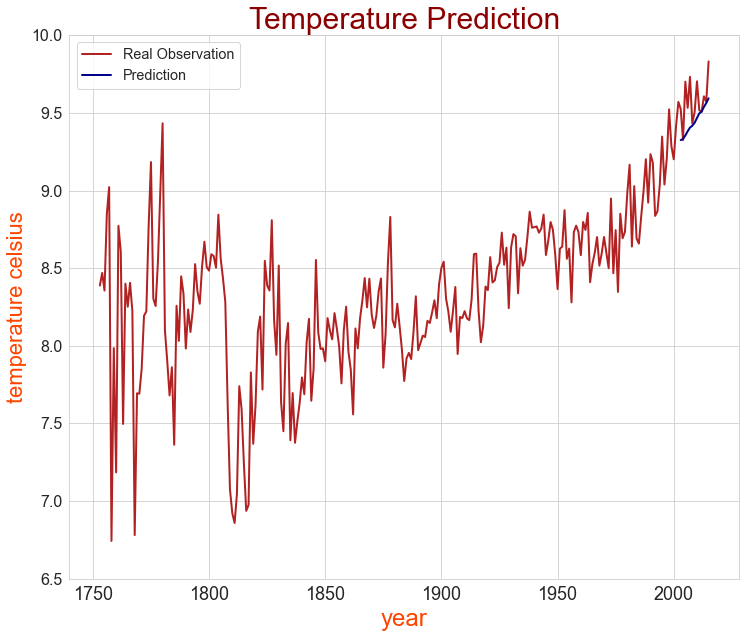

In [2264]:
dfy.plot(figsize=(12,10), linewidth=2, color='firebrick')
plt.plot(range(2003,2016), foca_tc_pro1.yhat, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

In [2263]:
print('RMSE:', np.sqrt(mean_squared_error(dfyear.y[250:], foca_tc_pro1.yhat)))

RMSE: 0.1780138658641929


In [2232]:
print('MAE:', mean_absolute_error(dfyear.y[250:], foca_tc_pro1.yhat))

MAE: 0.1295413965642747


__<font color='darkblue'>*Here we can see the modeling results are still not as good as previous models. So this confirms again that adding additional regressors in Fbprophet modeling is not as good as ARIMAX(exogenous variables) and VECM in this case.*__

### 10.5 Hyperparameter tuning using ParameterGrid Fbprophet

Let's try to see if using hyperparameter tuning can help improving Fbprophet modeling.

In [2240]:
from sklearn.model_selection import ParameterGrid
import random

In [2251]:
pro_grid = {'changepoint_prior_scale': [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7], 'n_changepoints': [5,10,20,30,50,100],
             'mcmc_samples': [-1,0], 'uncertainty_samples': [0,10,20,30,50,80,120,160,200]}
grid = ParameterGrid(pro_grid)
cnt = 0
for p in grid: 
    cnt = cnt + 1
print('total number of models:', cnt)

total number of models: 864


In [2253]:
hyperlist8 = []
mselist8 = []
rmselist8 = []
maelist8 = []
for p in grid:
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'], weekly_seasonality=False,
                         n_changepoints = p['n_changepoints'], daily_seasonality=False,
                         mcmc_samples = p['mcmc_samples'], uncertainty_samples = p['uncertainty_samples'])
    train_model.fit(t_year_train)
    train_forecast = train_model.predict(t_year_test)
    hyperlist8.append(p)
    mselist8.append(mean_squared_error(dfyear.y[210:], train_forecast.yhat))
    rmselist8.append(np.sqrt(mean_squared_error(dfyear.y[210:], train_forecast.yhat)))
    maelist8.append(mean_absolute_error(dfyear.y[210:], train_forecast.yhat))

In [2254]:
df_pro = pd.DataFrame()
df_pro['hyper'], df_pro['mse'], df_pro['rmse'], df_pro['mae'] = hyperlist8, mselist8, rmselist8, maelist8

In [2256]:
df_pro.sort_values('rmse').head()

,hyper,mse,rmse,mae
693,"{'changepoint_prior_scale': 0.6, 'mcmc_samples...",0.082366,0.286994,0.249968
695,"{'changepoint_prior_scale': 0.6, 'mcmc_samples...",0.082366,0.286994,0.249968
696,"{'changepoint_prior_scale': 0.6, 'mcmc_samples...",0.082366,0.286994,0.249968
697,"{'changepoint_prior_scale': 0.6, 'mcmc_samples...",0.082366,0.286994,0.249968
698,"{'changepoint_prior_scale': 0.6, 'mcmc_samples...",0.082366,0.286994,0.249968


__<font color='darkblue'>*Here by tuning the hyperparameters of Prophet model, 864 different situations are tried and best MSE and RMSE result are as above. The forecast results are improved, compared to section 10.1, but not improved a lot. Prophet models are still not as good as previous models.*__

## 11. Conclusions

__11.1 In this project, 6 different models are used to forecast the earth surface temperature. They are ARIMA, SARIMAX, ARIMAX, VAR, VECM and Fbprophet. Also, grid search of hyperparameters are used for all of the models to find out best performance hyperparameters. Evaluation metrics used are RMSE and MAE, and, best forecast of each model are ploted and analyzed. The best model is ARIMAX(with exogenous variables. For 13 years forecasting (2003 - 2015), best results are (RMSE:0.13, MAE:0.09) and (RMSE:0.12, MAE:0.11). For 53 years forcasting (1963 - 2015), the best results are (RMSE:0.18, MAE:0.15). VECM models gives almost same good results, (RMSE:0.13, MAE:0.10) for 13 years forecasting and (RMSE:0.19, MAE:0.15) for 53 years forcasting. Comparing to the annual-mean real observations of the earth surface temperatures from 2013 to 2015, 9.58°C, this error is very tiny. Also, prediction graphes looks perfect in section 6(ARIMAX) and 9(VECM). Thus, the prediction models are successful.__

__11.2 Cointegration analysis and Granger causality analysis are done for time series of temperature, CO2 and population. Analysis show that CO2 concentration in air has strong influence to the earth surface temperature change (it is not scientifically rigorous to conclude that CO2 concentration cause the global warming, but from my statistical analysis, CO2 concentration greatly influenced temperature raising). When it comes to population, analysis in this project show that world population does not directly influence the earth surface temperature, but the world's urban population has influence to earth surface temperature change.__

__This point is important and makes perfect sense. Since carbon dioxide emission are mainly generated by industrial activities, human activities (daily life consumption, power generation industry, steel industry, car-driving, etc). Of course the urban people consumes much more energy and generate much more harmful garbage than rural people. There are more cars in metropolitan areas, more air-conditioning, more heat vapors, etc.__

__11.3 Granger causality analysis show that CO2 concentration influences (Granger-cause) earth surface temperature but earth surface temperature is not influencing back to CO2 concentration as much as the influence of CO2 onto earth surface temperature. Also, for 3 time series together from 1950 to 2015, analysis results show that multivariates influence each other, but CO2 concentration and urban population influence (Granger-cause) earth surface temperature more than earth surface temperature influences backwards to CO2 concentration and urban population. So, CO2 time series and urban population time series provide statistically significant information about future earth surface temperature. But temperature time series does not give significant information about future CO2 concentration and urban populations.__ 

__This fact is the foundation of how ARIMAX model with exogenous variables, VAR model and VECM model shall be used.__

__11.4 The main reasons that ARIMAX model with exogenous variables(CO2 and urban population) and VECM work better in this case than ARIMA, SARIMAX, VAR and FBprohet is:__

__(1) Based on the nature of this case described in 11.3, it makes more sense to use CO2 and urban population as exogenous variables to assist forecast of temperature, rather than making them all to be equivalently interactive series in a VAR model;__ 

__(2) Combining stationary levels (VECM imposes additional restriction due to the existence of non-stationary but co-integrated data forms and utilize co-integration restriction infromation of the 3 time series) and differences from all time series in VECM also make more sense than making them all to be equivalently interactive series in a VAR model;__ 

__(3) Ignoring the information that CO2 time series and urban population time series provide (ARIMA models) definitely reduce the accuracy of the modeling. And, treating CO2 time series and urban population time series as additional regressors (Fbprophet) does not make sense as (1) and (2).__ 

__(4) The yearly earth surface temperature time series don't have seasonality, so SARIMAX model does not improve results.__ 

__11.5 Making long-run forecasts of the earth surface temperature is not as accurate as short time forecasts. In all different models, I tried both forecasting (1963-2015) and forecasting (2003-2015), short term forecasting (2003-2015) are always more accurate.__

__11.6 Analysis showed that the third industrial revolution time (1950s) is a watershed. Before third industrial revolution, the earth surface temperature increased slowly, increased only 8% over 200 years. But after third industrial revolution, earth surface temperature increased another 12% for recent 60 years. Coincidentally, carbon dioxide concentration increase also accelerate after 1950s. Between 1750s to 1950s, the carbon dioxide concentration in air increased around12%, but from 1950s to 2010s, it raised another 30%. This is a hint that carbon dioxide is related to earth surface temperature. Carbon dioxide is the major greenhouse gas that contribute to global warming, most people believe so although it not 100% sure that carbon dioxide emission caused the global warming.__

__11.7 EDA in Section 2, Cointegration analysis in Section 5 and Granger Causality analysis in Section 7 are all consistent in analyzing relationships between temperature, CO2 concentration and world's urban population. CO2 concentration and world's urban population influenced earth surface temperature, contributed to acceleration of global warming since the 1950s. So far, global warming has not shown significant influence back to CO2 concentration change and population change (but maybe in the future). Various models evaluation confirmed this point.__